From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper.Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on.For long, this process of sectioning was done manually by people but now technology can do it without much effort.In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

FEATURES:
STORY: A part of the main content of the article to be published as a piece of news.
SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

    Politics: 0
    Technology: 1
    Entertainment: 2
    Business: 3



In [1]:
import numpy as np
import pandas as pd
import warnings
warnings .simplefilter(action = 'ignore' ,category = FutureWarning)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_news = pd.read_csv(r"C:\Users\Asus\Desktop\Capstone Project 2 BI\Predict News Category\TrainDataset.csv")

In [3]:
train_news.head()

STORY  SECTION
0  The roadshow and the filing of nomination pape...        0
1  These vulnerabilities could have allowed hacke...        1
2  "People will now be able to include music in t...        1
3  Jersey is expected to have a good start at the...        2
4  Xiaomi’s unveiling also hints at how Samsung i...        1

In [4]:
test_news = pd.read_csv(r'C:\Users\Asus\Desktop\Capstone Project 2 BI\Predict News Category\TestDataset.csv')

In [5]:
test_news.head()

STORY
0  Privileged to have done this candid and COMPLE...
1  6) Some analysts expect volatility to remain h...
2  There is no stopping Marvel Cinematic Universe...
3  According to Ravi Menon, analyst at Elara Secu...
4  A complaint against Nadiadwala, known for prod...

In [6]:
len(train_news['STORY'].unique())

6045

In [7]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 2 columns):
STORY      6102 non-null object
SECTION    6102 non-null int64
dtypes: int64(1), object(1)
memory usage: 95.4+ KB


In [8]:
test_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 1 columns):
STORY    1526 non-null object
dtypes: object(1)
memory usage: 12.0+ KB


In [9]:
train_news.describe()

SECTION
count  6102.000000
mean      1.362012
std       1.001336
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000

In [10]:
test_news.describe()

STORY
count                                                1526
unique                                               1520
top     This story has been published from a wire agen...
freq                                                    3

In [11]:
train_news['SECTION'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
train_news.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [13]:
test_news.isnull().sum()

STORY    0
dtype: int64

In [14]:
plt1 = train_news.groupby('SECTION')['STORY'].count()
plt1

SECTION
0    1341
1    2224
2    1524
3    1013
Name: STORY, dtype: int64

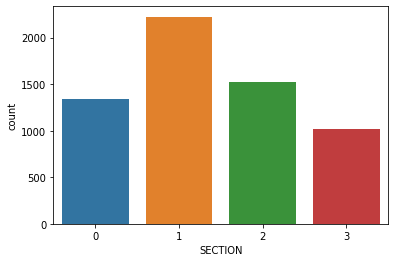

In [15]:
sns.countplot(data = train_news , x = 'SECTION')
plt.show()

#### sentence segementation tokenization 

In [16]:
news = train_news['STORY']
for i in news:
    words = nltk.sent_tokenize(i)
print(words)

['But unlike past developments that never caught on, such as 3D TVs, analysts believe 8K will become more popular eventually — just not ubiquitous.', 'Samsung announced its first 8K TV last year, an 85-inch model costing nearly $15,000.', 'The company unveiled four additional sizes Monday, though prices weren’t provided.', 'Also Monday, TCL announced plans for 8K sets with Roku’s streaming technology built-in.', 'LG has two 8K sets coming.', 'Many people at CES would rather hear about better video games.', 'Nvidia CEO Jensen Huang got a big round of applause when he told a crowd that he’d spend more time talking gaming than autonomous driving.', 'The Santa Clara, California-based chipmaker’s computer graphics technology is used in both industries.', 'But it was his unveiling of a new gaming-oriented graphics processor that elicited the biggest cheers Sunday night.', 'Huang also detailed how his company’s advances in artificial intelligence and a graphics technology called “ray tracing"

In [17]:
news1 = test_news['STORY']
for i in news:
    words = nltk.sent_tokenize(i)
print(words)

['But unlike past developments that never caught on, such as 3D TVs, analysts believe 8K will become more popular eventually — just not ubiquitous.', 'Samsung announced its first 8K TV last year, an 85-inch model costing nearly $15,000.', 'The company unveiled four additional sizes Monday, though prices weren’t provided.', 'Also Monday, TCL announced plans for 8K sets with Roku’s streaming technology built-in.', 'LG has two 8K sets coming.', 'Many people at CES would rather hear about better video games.', 'Nvidia CEO Jensen Huang got a big round of applause when he told a crowd that he’d spend more time talking gaming than autonomous driving.', 'The Santa Clara, California-based chipmaker’s computer graphics technology is used in both industries.', 'But it was his unveiling of a new gaming-oriented graphics processor that elicited the biggest cheers Sunday night.', 'Huang also detailed how his company’s advances in artificial intelligence and a graphics technology called “ray tracing"

#### word sengementation tokenization

In [18]:
for i in news:
    words = nltk.word_tokenize(i)
    print(words)

['The', 'roadshow', 'and', 'the', 'filing', 'of', 'nomination', 'papers', 'are', 'also', 'an', 'attempt', 'to', 'show', 'the', 'strength', 'of', 'the', 'ruling', 'BJP', 'in', 'the', 'eastern', 'UP', 'region', ',', 'as', 'several', 'ministers', 'and', 'allies', 'of', 'the', 'party', 'are', 'in', 'Varanasi', 'for', 'the', 'filing', 'of', 'nomination', ',', 'expected', 'on', 'Friday', '.', 'BJP', 'won', '17', 'of', 'the', '18', 'Lok', 'Sabha', 'seats', 'in', 'the', 'region', 'in', '2014', ',', 'losing', 'only', 'Azamgarh', 'to', 'Samajwadi', 'Party', 'patriarch', 'Mulayam', 'Singh', 'Yadav', '.', 'It', 'repeated', 'the', 'performance', 'in', 'the', '2017', 'assembly', 'polls', ',', 'when', 'it', 'returned', 'to', 'power', 'in', 'Uttar', 'Pradesh', 'after', 'a', 'gap', 'of', '15', 'years', '.', 'BJP', 'leaders', 'said', 'Modi', 'visits', 'Varanasi', 'every', 'few', 'months', 'and', 'meets', 'its', 'residents', '.', 'In', 'the', 'last', 'five', 'years', ',', 'he', 'had', 'been', 'to', 'Vara

['If', 'parents', 'find', 'that', 'the', 'apps', 'work', 'well', 'for', 'them', ',', 'then', 'they', 'should', 'use', 'them', ',', 'rather', 'than', 'stress', 'that', 'they', 'are', '“', 'doing', 'it', 'wrong', '”', 'when', 'teaching', 'their', 'children', 'about', 'money', '.', 'Photo', ':', 'AP', 'Some', 'banks', 'have', 'long', 'had', 'accounts', 'aimed', 'at', 'children', 'and', 'teenagers', ',', 'and', 'many', 'families', 'use', 'prepaid', 'debit', 'cards', 'rather', 'than', 'traditional', 'debit', 'cards', ',', 'linked', 'to', 'a', 'checking', 'account', 'as', 'a', 'way', 'to', 'help', 'children', 'manage', 'money', 'Jonathan', 'and', 'Erin', 'Kraftchick', 'started', 'out', 'by', 'paying', 'their', 'two', 'children', '’', 's', 'allowance', 'the', 'old-fashioned', 'way', ',', 'using', 'paper', 'money', '.', '“', 'I', 'tried', 'the', 'cash', 'thing', ',', "''", 'said', 'Jonathan', 'Kraftchick', ',', 'an', 'accountant', 'and', 'financial-literacy', 'advocate', 'in', 'Raleigh', ',', 

['But', 'with', 'fuel', 'costs', 'having', 'fallen', 'considerably', 'in', 'Q3', ',', 'the', 'outlook', 'on', 'SpiceJet', "'s", 'profitability', 'is', 'now', 'far', 'better', 'A', 'good', 'crisis', 'separates', 'the', 'men', 'from', 'the', 'boys', ',', 'goes', 'the', 'adage', '.', 'If', 'the', 'judgement', 'of', 'stock', 'market', 'investors', 'counts', ',', 'SpiceJet', 'Ltd', 'doesn', '’', 't', 'come', 'out', 'looking', 'very', 'good', '.', 'In', 'the', 'past', 'one', 'year', ',', 'when', 'the', 'airline', 'industry', 'grappled', 'with', 'lower', 'yields', ',', 'a', 'spike', 'in', 'crude', 'oil', 'prices', 'and', 'a', 'weaker', 'rupee', ',', 'the', 'company', '’', 's', 'shares', 'have', 'fallen', '48', '%', ',', 'while', 'those', 'of', 'InterGlobe', 'Aviation', 'Ltd', '(', 'which', 'runs', 'IndiGo', ')', 'have', 'corrected', 'only', '6', '%', '.', 'At', 'first', 'glance', ',', 'a', 'comparison', 'of', 'the', 'Q3', 'results', 'of', 'the', 'two', 'airlines', 'suggests', 'there', 'isn', 

['By', 'global', 'standards', ',', 'India', '’', 's', 'female', 'political', 'participation', 'lags', 'behind', 'major', 'democracies', 'including', 'its', 'neighbours', '.', 'Around', '13', '%', 'of', 'all', 'elected', 'representatives', 'in', 'the', 'Lok', 'Sabha', 'in', 'India', 'are', 'women', '.', 'According', 'to', 'data', 'from', 'the', 'Inter-Parliamentary', 'Union', ',', 'the', 'global', 'average', 'for', 'women', 'in', 'the', 'lower', 'house', 'of', 'parliament', 'is', '18', '%', '.', 'Both', 'Pakistan', '(', '20', '%', ')', 'and', 'Bangladesh', '(', '21', '%', ')', 'also', 'have', 'more', 'women', 'in', 'the', 'lower', 'house', 'of', 'the', 'parliament', 'than', 'India', '.', 'A', 'feature', 'of', 'female', 'political', 'participation', 'is', 'that', 'women', 'are', 'more', 'likely', 'to', 'be', 'fielded', 'from', 'constituencies', 'reserved', 'for', 'the', 'scheduled', 'castes', '(', 'SCs', ')', 'and', 'scheduled', 'tribes', '(', 'STs', ')', '.', 'In', '2014', ',', '24', '%

['Treasuries', 'have', 'led', 'a', 'global', 'debt', 'rally', 'amid', 'bets', 'that', 'a', 'recession', 'and', 'a', 'rate-cutting', 'cycle', 'are', 'coming', '.', 'The', 'spread', 'between', 'yields', 'on', 'three-month', 'U.S.', 'bills', 'and', '10-year', 'notes', 'inverted', 'for', 'the', 'first', 'time', 'since', '2007', 'amid', 'reports', 'showing', 'economic', 'weakness', 'in', 'the', 'U.S.', ',', 'France', 'and', 'Germany', '.', 'Money', 'markets', 'are', 'pricing', 'around', 'a', '90', 'percent', 'chance', 'that', 'the', 'Federal', 'Reserve', 'will', 'cut', 'rates', 'by', '25', 'basis', 'points', 'by', 'December', ',', 'followed', 'by', 'another', 'reduction', 'in', 'September', '2020', '.', 'This', 'comes', 'after', 'the', 'central', 'bank', 'projected', 'no', 'hikes', 'this', 'year', 'at', 'its', 'policy', 'meeting', 'last', 'week', '.', 'Open', 'interest', ',', 'a', 'measure', 'of', 'outstanding', 'positions', 'across', 'Treasury', 'bond', 'futures', ',', 'jumped', 'Friday', 

['Nokia', "'s", 'flagship', 'smartphone', ',', 'the', 'Nokia', '8.1', ',', 'recently', 'received', 'a', 'new', 'variant', 'with', '6GB', 'of', 'RAM', 'and', '128GB', 'of', 'internal', 'storage', '.', 'While', 'the', 'rest', 'of', 'the', 'specifications', 'and', 'features', 'of', 'the', 'new', 'variant', 'remain', 'unchanged', ',', 'it', 'is', 'priced', 'almost', '₹3,000', 'higher', 'than', 'the', '4GB', 'RAM', 'model', 'at', '₹29,999', '.', 'The', 'smartphone', 'is', 'available', 'for', 'purchase', 'online', 'on', 'Amazon', 'and', 'Nokia', 'Online', 'Shop', 'as', 'well', 'as', 'offline', 'retail', 'outlets', '.', 'Offers', 'on', 'the', 'smartphone', 'include', 'additional', '1TB', 'of', '4G', 'data', 'on', 'eligible', 'Airtel', 'prepaid', 'plans', 'starting', 'at', '₹199', '.', 'Airtel', 'postpaid', 'users', 'will', 'get', '120GB', 'of', 'additional', 'data', 'along', 'with', '3', 'months', 'of', 'free', 'Netflix', 'subscription', 'and', 'a', 'year', 'of', 'Amazon', 'Prime', 'membershi

["'If", 'we', 'are', 'in', 'power', 'we', 'will', 'continue', 'the', 'same', 'glide', 'path', ',', "'", 'says', 'finance', 'minister', 'Arun', 'Jaitley', 'at', 'a', 'CII', 'event', 'in', 'New', 'Delhi', 'on', 'Thursday', '.', '(', 'PTI', ')', 'Businesses', 'and', 'investors', 'can', 'expect', 'continuity', 'in', 'economic', 'policies', 'if', 'NDA', 'is', 're-elected', ',', 'finance', 'minister', 'Arun', 'Jaitley', 'indicates', 'If', 'NDA', 'returns', 'to', 'power', ',', 'it', 'will', 'be', 'able', 'to', 'maintain', 'GDP', 'growth', 'rates', 'similar', 'to', 'what', 'India', 'has', 'seen', 'in', 'past', 'five', 'years', ',', 'he', 'says', 'New', 'Delhi', ':', 'The', 'PM', 'Narendra', 'Modi-led', 'National', 'Democratic', 'Alliance', 'government', 'will', 'follow', 'the', 'path', 'of', 'fiscal', 'prudence', 'and', 'implement', 'policies', 'that', 'will', 'lead', 'to', 'lower', 'tax', 'rates', ',', 'finance', 'minister', 'Arun', 'Jaitley', 'said', ',', 'indicating', 'businesses', 'and', '

['While', 'new', 'wireless', 'and', 'satellite', 'technologies', 'have', 'been', 'invented', 'in', 'the', 'decades', 'since', ',', 'cables', 'remain', 'the', 'fastest', ',', 'most', 'efficient', 'and', 'least', 'expensive', 'way', 'to', 'send', 'information', 'across', 'the', 'ocean', '.', 'And', 'it', 'is', 'still', 'far', 'from', 'cheap', ':', 'Google', 'would', 'not', 'disclose', 'the', 'cost', 'of', 'its', 'project', 'to', 'Chile', ',', 'but', 'experts', 'say', 'subsea', 'projects', 'cost', 'up', 'to', '$', '350', 'million', ',', 'depending', 'on', 'the', 'length', 'of', 'the', 'cable', '.', 'In', 'the', 'modern', 'era', ',', 'telecommunications', 'companies', 'laid', 'most', 'of', 'the', 'cable', ',', 'but', 'over', 'the', 'past', 'decade', ',', 'U.S.', 'tech', 'giants', 'started', 'taking', 'more', 'control', '.', 'Google', 'has', 'backed', 'at', 'least', '14', 'cables', 'globally', '.', 'Amazon', ',', 'Facebook', 'and', 'Microsoft', 'have', 'invested', 'in', 'others', ',', 'conn

['The', 'sticker', 'can', 'be', 'used', 'by', 'opening', 'the', 'camera', ',', 'taking', 'a', 'proud', 'selfie', ',', 'tapping', 'the', 'sticker', 'icon', 'and', 'selecting', 'the', 'sticker', 'from', 'the', 'tray', '.', 'Additionally', ',', 'once', 'a', 'user', 'taps', 'and', 'clicks', 'on', 'the', 'sticker', ',', 'they', 'will', 'be', 'directed', 'to', 'the', 'National', 'Voters', 'Services', 'Portal', 'which', 'will', 'help', 'voters', 'find', 'their', 'respective', 'polling', 'locations', 'during', 'the', 'different', 'phases', 'of', 'elections', '.', 'Instagram', "'s", 'parent', 'company', 'Facebook', 'Inc.', 'on', 'Monday', 'said', 'it', 'is', 'removing', 'around', 'a', 'million', 'abusive', 'accounts', 'every', 'day', 'using', 'Artificial', 'Intelligence', '(', 'AI', ')', 'and', 'Machine', 'Learning', '(', 'ML', ')', '.', 'Facebook', 'also', 'said', 'it', 'is', 'working', 'with', 'its', 'family', 'of', 'apps', ',', 'which', 'includes', 'Instagram', 'and', 'WhatsApp', ',', 'to', 

['I', 'felt', 'that', 'this', 'was', 'like', 'putting', 'a', 'bird', 'in', 'a', 'cage', ',', 'except', 'there', 'were', 'human', 'beings', 'behind', 'bars', 'and', 'everybody', 'wants', 'to', 'fly', ',', '”', 'she', 'says', 'The', 'cinematography', 'in', 'No', 'Woman', '’', 's', 'Land', 'has', 'a', 'lyrical', 'quality', 'as', 'the', 'film', 'captures', 'picturesque', 'locales', 'of', 'the', 'hill', 'terrain', 'even', 'as', 'her', 'narrative', 'reveals', 'practices', 'such', 'as', 'polyandry', 'that', 'stem', 'from', 'the', 'gender-skewed', 'property', 'laws', 'Behind', 'the', 'Bars', 'is', 'visually', 'haunting', 'while', 'Laal', 'Hota', 'Drakht', 'is', 'studded', 'with', 'lilting', 'folk', 'songs', 'from', 'the', 'hills', '“', 'I', 'like', 'to', 'stay', 'updated', 'on', 'the', 'styles', 'of', 'documentary', 'films', 'from', 'across', 'the', 'world', 'but', 'I', 'believe', 'in', '‘', 'think', 'global', ',', 'act', 'local', '’', 'We', 'have', 'started', 'a', 'festival', 'called', 'Inter

['Viva', 'is', 'one', 'of', 'our', 'first', 'forays', 'into', 'AI', '.', 'It', 'can', 'currently', 'handle', '10,000', 'enquiries', 'per', 'second', '24x7', ',', 'or', '864', 'million', 'a', 'day', ',', 'says', 'Barry', 'Cook', 'of', 'VFS', 'Global', 'mint-india-wire', 'data', 'ProtectionGDPRBarry', 'CookVFS', 'Globalvisa', 'applicationsartificial', 'intelligenceGoogle', 'Analytics', 'Mumbai', ':', 'VFS', 'Global', ',', 'which', 'processes', 'about', 'five', 'million', 'visa', 'applications', 'from', 'Indian', 'citizens', 'annually', ',', 'has', 'its', 'work', 'cut', 'out', 'with', 'the', 'country', 'insisting', 'that', 'its', 'residents', '’', 'personal', 'data', 'should', 'be', 'processed', 'and', 'stored', 'on', 'local', 'servers', '.', 'In', 'a', 'recent', 'interview', ',', 'Barry', 'Cook', ',', 'privacy', 'and', 'group', 'data', 'protection', 'officer', 'at', 'VFS', 'Global', ',', 'explained', 'how', 'the', 'organization', 'is', 'approaching', 'the', 'issue', ',', 'and', 'also', '

['The', 'superstar', 'took', 'a', 'break', 'from', 'the', 'shoot', 'of', 'his', 'upcoming', 'film', 'Darbar', 'in', 'Mumbai', 'and', 'flew', 'to', 'Chennai', 'to', 'vote', 'She', 'tweeted', ',', '“', 'Today', 'is', 'the', 'day', '!', '!', 'Vote', 'because', 'it', 'matters', '!', '”', 'Also', 'read', '|', 'Lok', 'Sabha', 'Elections', '2019', 'Phase', '2', 'Voting', 'LIVE', 'UpdatesActors', 'Suriya', 'and', 'Karthi', 'were', 'also', 'clicked', 'at', 'the', 'polling', 'booth', 'in', 'Chennai']
['Polling', 'in', 'India', '’', 's', 'national', 'election', 'ends', 'on', '19', 'May', 'and', 'final', 'results', 'will', 'be', 'announced', 'on', '23', 'May', '.', 'Investors', 'are', 'also', 'keeping', 'an', 'eye', 'on', 'the', 'ongoing', 'March-quarter', 'earnings', '.', 'Net', 'income', 'at', '10', 'of', 'the', '14', 'Nifty', 'companies', 'that', 'have', 'reported', 'their', 'results', 'so', 'far', 'have', 'either', 'beaten', 'or', 'matched', 'analyst', 'estimates', ',', 'according', 'to', 'dat

['Google', 'CEO', 'Sundar', 'Pichai', 'speaks', 'during', 'a', 'Google', 'keynote', 'address', 'announcing', 'a', 'new', 'video', 'gaming', 'streaming', 'service', 'named', 'Stadia', 'that', 'attempts', 'to', 'capitalize', 'on', 'the', 'company', "'s", 'cloud', 'technology', 'and', 'global', 'network', 'of', 'data', 'centers', '.', '(', 'Reuters', ')', 'Stadia', 'allows', 'users', 'to', 'play', 'games', 'on', 'their', 'internet', 'browser', 'without', 'having', 'to', 'wait', 'for', 'any', 'content', 'to', 'be', 'downloaded', 'to', 'their', 'device', 'Players', 'can', 'control', 'their', 'characters', 'using', 'mice', 'and', 'keyboards', ',', 'USB', 'controllers', 'or', 'a', 'new', 'WiFi-enabled', 'controller', 'developed', 'by', 'Google']
['These', 'insights', 'will', 'be', 'available', 'to', 'users', 'in', 'three', 'formats—Smart', 'stats', ',', 'Luck', 'index', 'and', 'Forecaster', '.', 'Smart', 'stats', 'will', 'provide', 'fans', 'with', 'a', 'more', 'realistic', 'view', 'of', 'play

['The', 'internet', 'was', 'going', 'to', 'make', 'us', 'free', 'and', 'unleash', 'human', 'potential', '.', 'How', 'did', 'we', 'accept', 'Uber', 'as', 'the', 'high', 'point', '?', 'Thirty', 'years', 'ago', ',', 'one', 'March', 'day', 'in', '1989', ',', 'at', 'CERN', '(', 'European', 'Organization', 'for', 'Nuclear', 'Research', ')', 'in', 'Geneva', ',', '33-year-old', 'British', 'computer', 'scientist', 'Tim', 'Berners-Lee', 'handed', 'his', 'boss', 'Mike', 'Sendall', 'a', 'note', ',', 'blandly', 'titled', 'Information', 'Management', ':', 'A', 'Proposal', '.', 'The', 'abstract', 'of', 'the', 'proposal', 'read', ':', '“', 'This', 'proposal', 'concerns', 'the', 'management', 'of', 'information', 'about', 'accelerators', 'and', 'experiments', 'at', 'CERN', '.', 'It', 'discusses', 'the', 'problems', 'of', 'loss', 'of', 'information', 'about', 'complex', 'evolving', 'systems', 'and', 'derives', 'a', 'solution', 'based', 'on', 'a', 'distributed', 'hypertext', 'system', '.', "''", 'Sendall

['Domestically', ',', 'traders', 'awaiting', 'fiscal', 'deficit', 'data', 'for', 'April-December', 'and', 'revised', 'annual', 'gross', 'domestic', 'product', '(', 'GDP', ')', 'estimate', 'for', 'fiscal', 'year', '2018', 'due', 'later', 'on', 'Thursday', '.', 'Traders', 'will', 'also', 'remain', 'cautious', 'ahead', 'of', 'interim', 'budget', 'on', '1', 'February', '.', 'So', 'far', 'this', 'year', ',', 'the', 'rupee', 'has', 'declined', '1.88', '%', 'against', 'the', 'US', 'dollar', ',', 'while', 'foreign', 'investors', 'have', 'sold', '$', '496.10', 'million', 'and', '$', '292.60', 'million', 'in', 'the', 'equity', 'and', 'debt', 'markets', 'respectively', '.']
['In', 'contrast', ',', 'during', 'the', 'recently', 'concluded', 'assembly', 'elections', 'in', 'November', ',', '650', 'companies', ',', 'comprising', '77,000', 'paramilitary', 'personnel', ',', 'had', 'been', 'deployed', 'across', 'Rajnandgaon', ',', 'Kanker', ',', 'Kondagaon', ',', 'Narayanpur', ',', 'Jagdalpur', ',', 'Bas

['The', 'Galaxy', 'Fold', 'has', 'a', '4.6-inch', 'screen', 'on', 'the', 'front', ',', 'which', 'makes', 'it', 'smaller', 'than', 'most', 'modern', 'smartphone', 'screens', '.', 'But', 'it', 'opens', 'up', 'to', 'become', 'a', '7.3-inch', 'tablet', ',', 'letting', 'users', 'run', 'three', 'apps', 'at', 'once', '.', 'It', 'has', 'half', 'a', 'terabyte', 'of', 'storage', 'and', '12', 'gigabytes', 'of', 'RAM', ',', 'rivaling', 'high-end', 'laptops', '.', 'It', 'also', 'has', 'six', 'cameras', 'and', 'a', 'pair', 'of', 'batteries', '.', 'The', 'device', 'feels', 'like', 'a', 'tablet', 'when', 'opened', 'up', '.', 'There', '’', 's', 'a', 'satisfying', 'click', 'sound', 'for', 'the', 'hinge', '.', 'A', 'crease', 'is', 'noticeable', ',', 'but', 'it', 'doesn', '’', 't', 'get', 'in', 'the', 'way', 'of', 'using', 'it', '.', 'There', '’', 's', 'spacing', 'between', 'two', 'sides', 'of', 'the', 'touchscreen', 'keyboard', 'so', 'that', 'typing', 'with', 'thumbs', 'is', 'comfortable', '.', 'When', '

['The', 'Super-Res', 'Zoom', 'feature', 'also', 'takes', 'a', 'burst', 'of', 'photos', 'when', 'you', 'zoom', 'in', '.', 'This', 'doesn', '’', 't', 'outperform', 'the', 'iPhone', 'XS', '’', 'optical', 'zoom', ',', 'but', 'it', 'is', 'noticeably', 'better', 'than', 'the', 'digital', 'zoom', 'on', 'other', 'phones', '.', 'The', 'Pixel', '3', 'XL', '’', 's', 'camera', 'is', 'certainly', 'the', 'best', 'a', 'smartphone', 'can', 'offer', 'today', '.', 'Battery', ':', 'On', 'day-to-day', 'usage', ',', 'the', 'Pixel', '3', 'XL', '’', 's', 'battery', 'lasts', 'a', 'full', 'work-day', '.', 'However', ',', 'what', '’', 's', 'more', 'important', 'is', 'Google', '’', 's', '‘', 'adaptive', 'battery', '’', 'feature', '.', 'This', 'feature', ',', 'which', 'uses', 'AI', 'to', 'prioritise', 'battery', 'power', 'for', 'apps', 'used', 'often', ',', 'has', 'allowed', 'net', 'promoter', 'scores', '(', 'NPS', ')', 'for', 'the', 'Pixel', '2', 'to', 'increase', 'over', 'time', '.', 'It', 'should', 'help', 'Pi

['Morgan', 'Stanley', 'looked', 'at', 'how', 'Apple', 'platforms', 'could', 'disrupt', 'various', 'processes', 'in', 'the', 'health-care', 'industry', 'and', 'used', 'the', 'integrated', 'iPhone/iPad', ',', 'iOS', ',', 'App', 'Store', 'ecosystem', 'as', 'a', 'guide', 'for', 'how', 'much', 'cost', 'savings', 'could', 'ultimately', 'accrue', 'to', 'the', 'company', '.', 'The', 'US', 'health-care', 'opportunity', 'is', 'three', 'times', 'larger', 'than', 'the', 'global', 'smartphone', 'market', ',', 'according', 'to', 'projections', ',', 'while', 'international', 'expansion', 'offers', 'even', 'more', 'upside', '.', 'While', 'competitors', 'like', 'Alphabet', 'Inc.', '’', 's', 'Google', 'and', 'Amazon.com', 'Inc.', 'may', 'have', 'greater', 'artificial', 'intelligence', 'capabilities', ',', 'Apple', '’', 's', 'vast', 'user', 'base', 'is', 'a', 'clear', 'advantage', 'that', 'can', 'not', 'be', 'underestimated', ',', 'the', 'analysts', 'added', '.']
['“', 'This', 'year', ',', 'too', ',', 's

['In', 'terms', 'of', 'campaign', 'publicity', ',', 'Congress', 'is', 'looking', 'at', 'radio', 'jingles', ',', 'cinema', 'spots', ',', 'out', 'of', 'home', '(', 'OOH', ')', 'hoardings', ',', 'digital', 'screens', ',', 'public', 'transport', ',', 'container', 'trucks', ',', 'print', 'advertisements', 'as', 'well', 'as', 'digital', 'and', 'social', 'media', 'outreach', '.', 'On', 'Sunday', ',', 'it', 'also', 'announced', 'issue', 'specific', 'slogans', 'like', '“', 'jan', 'jan', 'se', 'naata', 'hai', ',', 'sarkaar', 'chalaana', 'aata', 'hai', "''", 'among', 'others', '.', 'The', 'slogan', 'loosely', 'translates', 'to', '“', 'connected', 'to', 'everyone', ',', 'we', 'known', 'how', 'to', 'run', 'a', 'government', "''", '.']
['It', 'is', 'high', 'time', 'Raghava', 'Lawrence', 'stopped', 'making', 'ill-conceived', 'and', 'badly-executed', 'sequels', ',', '”', 'wrote', 'indianexpress']
['People', 'look', 'at', 'a', 'screen', 'displaying', 'the', 'Sensex', 'results', 'on', 'the', 'facade', '

['Thousands', 'of', 'people', 'lined', 'the', 'streets', 'for', 'several', 'kilometres', ',', 'waving', 'Congress', 'flags', 'and', 'chanting', 'her', 'name', '.', '``', 'There', 'is', 'support', 'for', 'Congress', 'because', 'of', 'Priyanka', ',', "''", 'said', 'Mahesh', 'Gupta', ',', 'a', 'shopkeeper', 'in', 'the', 'temple', 'town', 'of', 'Ayodhya', ',', 'where', 'she', 'visited', 'a', 'shrine', 'in', 'late', 'March', '.', 'Gupta', ',', 'who', 'referred', 'to', 'Vadra', 'by', 'her', 'first', 'name', ',', 'as', 'many', 'Indians', 'do', ',', 'voted', 'for', 'Modi', 'in', 'the', 'last', 'election', ',', 'but', 'said', 'he', 'was', 'considering', 'Congress', 'after', 'seeing', 'her', 'campaign', '.', 'Ayodhya', 'is', 'at', 'the', 'heart', 'of', 'decades', 'of', 'political', 'strife', 'in', 'India', 'since', 'the', 'Babri', 'Masjid', 'demolition', 'in', '1992', '.', 'Priyanka', 'Gandhi', ',', 'a', 'marquee', 'campaigner', 'for', 'Congress', ',', 'chose', 'Ayodhya', 'as', 'one', 'of', 'her

['Facebook', ',', 'with', 'more', 'than', 'two', 'billion', 'global', 'users', ',', 'is', 'among', 'the', 'social', 'media', 'websites', 'that', 'provide', 'access', 'at', 'no', 'cost', '.', 'The', 'researchers', 'found', 'that', 'Facebook', 'users', 'would', 'require', 'an', 'average', 'of', 'more', 'than', '$', '1,000', 'to', 'deactivate', 'their', 'account', 'for', 'one', 'year', '.', '“', 'Social', 'media', ',', 'and', 'the', 'internet', 'more', 'broadly', ',', 'have', 'changed', 'the', 'way', 'we', 'live', 'and', 'the', 'way', 'we', 'keep', 'in', 'touch', 'with', 'friends', 'and', 'family', ',', 'but', 'it', '’', 's', 'hard', 'to', 'find', 'evidence', 'that', 'the', 'internet', 'has', 'made', 'us', 'richer', 'or', 'more', 'productive', 'at', 'work', ',', "''", 'said', 'Jay', 'Corrigan', ',', 'a', 'professor', 'at', 'Kenyon', 'College', 'in', 'the', 'US', '.']
['Belsky', 'should', 'know', 'since', 'he', 'oversees', 'Adobe', '’', 's', 'design', 'team', 'across', 'all', 'Adobe', 'pro

['c', 'After', 'years', 'of', 'setbacks', ',', 'the', 'industry', 'has', 'settled', 'on', 'extreme', 'ultraviolet', 'lithography', ',', 'which', 'uses', 'plasma', 'as', 'the', 'light', 'source', 'to', 'draw', 'lines', 'smaller', 'than', '7', 'nanometers', '.', 'That', '’', 's', 'the', 'size', 'seen', 'in', 'Apple', 'Inc.', '’', 's', 'A12', 'Bionic', 'chip', ',', 'featured', 'in', 'the', 'iPhone', 'XS', 'and', 'XR', '.', 'In', '2017', ',', 'Yokohama', ',', 'Japan-based', 'Lasertec', 'solved', 'the', 'final', 'piece', 'of', 'the', 'puzzle', 'when', 'it', 'created', 'a', 'machine', 'that', 'can', 'test', 'blank', 'EUV', 'masks', 'for', 'internal', 'flaws', ',', 'giving', 'it', 'a', 'monopoly', '.', 'The', 'company', '’', 's', 'stock', 'has', 'tripled', 'since', 'then', '.', 'Lasertec', 'has', 'already', 'received', 'orders', 'for', '4', 'billion', 'yen', '(', '$', '36', 'million', ')', 'machines', 'that', 'test', 'EUV', 'blanks', ',', 'according', 'to', 'Lasertec', 'President', 'Osamu', '

['Blockchain', ',', 'primarily', 'known', 'for', 'powering', 'cryptocurrencies', 'like', 'bitcoins', ',', 'is', 'a', 'form', 'of', 'Distributed', 'Ledger', 'Technology', '(', 'DLT', ')', 'that', 'promises', 'to', 'reduce', 'costs', 'and', 'establish', 'trust', ',', 'but', 'faces', 'challenges', 'like', 'the', 'speed', 'of', 'processing', 'transactions', '.', 'Its', 'popularity', 'lies', 'in', 'the', 'fact', 'that', 'participants', 'have', 'a', 'copy', 'of', 'the', 'ledger', '’', 's', 'data', 'that', 'contains', 'the', 'most', 'recent', 'transactions', 'or', 'changes', ',', 'thus', 'reducing', 'the', 'need', 'to', 'establish', 'trust', 'using', 'traditional', 'methods', '.', 'Blockchain', 'is', '“', 'pulling', 'us', 'into', 'a', 'new', 'era', 'of', 'openness', ',', 'decentralization', 'and', 'global', 'inclusion', "''", ',', 'states', 'a', 'June', '2017', 'paper', 'by', 'the', 'World', 'Economic', 'Forum', '(', 'WEF', ')', '.', 'Large', 'banking', ',', 'financial', 'services', 'and', 'i

['The', 'Redmi', 'Note', '7', 'is', 'priced', 'at', '999', 'Yuan', '(', 'about', '₹', '10,000', ')', 'for', 'the', '3GB/32GB', 'variant', ',', '1,199', 'Yuan', '(', 'about', '₹', '12,500', ')', 'for', 'the', '4GB/64GB', 'variant', 'and', '1,399', 'Yuan', '(', 'about', '₹', '14,500', ')', 'for', 'the', '6GB/64GB', 'variant', '.', 'The', 'first', 'flash', 'sale', 'of', 'the', 'Redmi', 'Note', '7', 'will', 'give', 'us', 'a', 'rough', 'idea', 'of', 'what', 'to', 'expect', 'from', 'smartphone', 'sales', 'this', 'year—one', 'of', 'the', 'most', 'popular', 'smartphone', 'makers', 'in', 'the', 'world', 'is', 'set', 'to', 'sell', 'one', 'of', 'the', 'most', 'popular', 'devices', 'at', 'their', 'home', 'turf', '.', 'Redmi', 'Note', '7RedmiXiaomiRedmi', 'Note', '7', '1', 'million', 'unitsRedmi', 'Note', '7', 'priceRedmi', 'Note', '7', 'India', 'launchRedmi', 'Note', '7', 'sales']
['Sydney', ':', 'The', 'stock', 'sell-off', 'that', 'gripped', 'markets', 'Wall', 'Street', 'on', 'Friday', 'rolled', 

['The', 'cross-cutting', 'influences', 'of', 'gender', ',', 'class', ',', 'caste', ',', 'religion', 'and', 'region', ',', 'which', 'powerfully', 'shape', 'social', 'experiences', 'in', 'India', ',', 'also', 'demand', 'a', 'scepticism', 'towards', 'the', '“', 'millennial', "''", 'as', 'a', 'distinct', 'category', 'of', 'the', 'electorate', '.', 'The', 'influence', 'of', 'gender', 'on', 'youth', 'attitudes', 'is', 'strong', 'and', 'clear', '.', 'Fewer', 'women', ',', 'for', 'instance', ',', 'are', 'interested', 'in', 'politics', 'than', 'men', '.', 'In', 'a', 'graphic', 'illustration', 'of', 'the', 'power', 'of', 'patriarchy', ',', 'large', 'numbers', 'of', 'male', 'and', 'female', 'youth', 'concur', 'that', 'wives', 'should', 'remain', 'obedient', 'to', 'their', 'husbands', 'and', 'not', 'work', 'outside', 'the', 'house', '.', 'Class', 'and', 'caste', 'inequalities', 'have', 'major', 'consequences', 'for', 'the', 'social', 'experience', 'of', 'youth', '.', 'For', 'instance', ',', 'econo

['The', 'short-term', 'PPAs', 'are', 'expected', 'to', 'halve', 'losses', 'at', 'CESC', '’', 's', 'Chandrapur', 'power', 'plant', 'in', 'FY19', '.', 'JSW', 'Energy', 'is', 'in', 'talks', 'for', 'two', 'short-', 'to', 'medium-term', 'PPAs', 'for', 'its', 'Vijayanagar', 'plant', '.', 'If', 'successful', ',', 'this', 'will', 'drive', 'up', 'utilization', 'levels', 'of', 'the', 'plant', ',', 'which', ',', 'as', 'of', 'December', 'quarter', ',', 'stood', 'at', 'a', 'mere', '55', '%', '.', 'JSPL', ',', 'which', 'is', 'among', 'the', 'lowest', 'bidders', 'for', 'a', 'medium-term', '500MW', 'PPA', ',', 'will', 'see', 'utilization', 'levels', 'at', 'its', 'unit', 'reach', 'the', 'halfway', 'mark', ',', 'if', 'the', 'contract', 'comes', 'through', '.', 'While', 'all', 'this', 'sounds', 'good', ',', 'much', 'depends', 'on', 'the', 'timelines', '.', 'Such', 'contracts', 'have', 'seen', 'inordinate', 'delays', 'in', 'the', 'past', '.', 'It', '’', 's', 'little', 'wonder', 'then', 'that', 'investors'

['(', 'L-R', ')', 'Prime', 'Minister', 'Narendra', 'Modi', 'with', 'Tamil', 'Nadu', 'CM', 'Edappadi', 'K.', 'Palaniswami', 'of', 'the', 'AIADMK', ';', 'Congress', 'president', 'Rahul', 'Gandhi', 'being', 'presented', 'a', 'sword', 'by', 'DMK', 'president', 'M.K', '.', 'Stalin', 'at', 'a', 'public', 'meeting', 'in', 'Chennai', '.', '(', 'AFP/PTI', ')', 'After', 'the', 'deaths', 'of', 'Jayalalithaa', 'and', 'Karunanidhi', ',', 'BJP', 'and', 'Congress', 'have', 'forged', 'alliances', 'with', 'AIADMK', 'and', 'DMK', 'for', 'Elections', '2019', '.', 'But', 'will', 'these', 'again', 'be', 'cases', 'of', "'bad", 'friendship', 'ending', 'in', 'disaster', "'", '?', 'Chennai', ':', 'The', 'results', 'of', 'forthcoming', 'elections', 'in', 'Tamil', 'Nadu', 'will', 'keep', 'psephologists', ',', 'political', 'scientists', ',', 'and', 'historians', 'busy', 'for', 'some', 'years', 'to', 'come', '.', 'Numbers', 'will', 'be', 'crunched', '.', 'The', 'strength', 'of', 'various', 'political', 'parties', 

['The', 'detailed', 'final', 'stretch', ',', 'where', 'all', 'the', 'dots', 'are', 'connected', '&', 'the', 'mystery', 'is', 'explained', ',', 'lifts', 'the', 'overall', 'film', '#', 'VellaiPookal', '-', 'There', 'are', 'some', 'issues', ',', 'like', 'the', 'performances', 'of', 'the', 'American', 'actors', '&', 'some', 'exaggerated', 'narrative', 'patterns', ',', 'but', 'the', 'conviction', 'of', 'Dir', '#', 'VivekElangovan', 'to', 'make', 'a', 'USA-based', 'crime', 'thriller', 'with', 'the', '@', 'Actor_Vivek', '-', 'Charlie', 'duo', 'deserves', 'praise', 'He', "'s", 'a', 'promising', 'director👍', '#', 'VellaiPookal', '-', 'The', 'gripping', 'background', 'score', ',', 'the', 'Seattle', 'setting', '&', 'support', 'actors', 'like', '@', 'AmDev06', ',', '@', 'iamrascalpapa', ',', 'Charlie', ',', 'Paige', 'Henderson', 'add', 'to', 'the', 'film', "'s", 'value', 'The', 'Child', 'abuse', 'angle', 'is', 'topical', '!', '``', 'Nani', 'said', 'Jersey', 'is', 'the', 'best', 'work', 'he', 'has'

['``', 'We', 'are', 'optimistic', 'on', 'gold', 'in', 'long-term', 'perspective', '.', 'Markets', 'are', 'going', 'to', 'be', 'more', 'interested', 'in', 'safe-haven', 'assets', 'in', 'light', 'of', 'volatility', 'from', 'a', 'slowing', 'economy', ',', "''", 'Lu', 'of', 'Phillip', 'Futures', 'said', '.', 'Reflecting', 'investors', 'sentiment', ',', 'holdings', 'in', 'the', 'world', "'s", 'largest', 'gold-backed', 'exchange-traded', 'fund', ',', 'SPDR', 'Gold', 'Trust', ',', 'rose', 'about', '0.4', 'percent', 'on', 'Tuesday', '.', 'Holdings', 'have', 'risen', 'after', 'seeing', 'heavy', 'liquidations', 'due', 'to', 'a', 'sharp', 'correction', 'bullion', 'prices', '.', 'Silver', 'gained', '0.1', 'percent', 'to', '$', '15.44', 'per', 'ounce', ',', 'after', 'touching', 'its', 'highest', 'since', 'March', '1', 'earlier', 'in', 'the', 'session', '.']
['``', 'We', "'ve", 'also', 'designed', 'them', 'so', 'they', 'do', "n't", 'include', 'unnecessary', 'hardware', 'or', 'software', '--', 'reduc

['The', '5G', 'enabled', 'Mi', 'Mix', '3', 'will', 'start', 'rolling', 'out', 'next', 'year', 'and', 'it', 'will', 'be', 'very', 'different', 'under', 'the', 'hood', '.', 'Photo', ':', 'Xiaomi', 'The', 'Mi', 'Mix', '3', 'starts', 'at', '3,299', 'Yuan', '(', 'about', '₹39,000', ')', 'for', 'the', '6GB/128GB', 'variant', '.', '5G', 'enabled', '“', 'Forbidden', 'City', 'Palace', 'Museum', '”', 'edition', 'with', '10GB', 'RAM', 'and', '256GB', 'storage', 'will', 'go', 'on', 'sale', 'next', 'year', 'for', '4,999', 'yuan', '(', 'about', '₹53,000', ')', 'The', 'Qualcomm', 'Summit', '2018', 'unveiled', 'one', 'of', 'the', 'most', 'anticipated', 'additions', 'to', 'modern', 'smartphones—', 'the', 'inclusion', 'of', '5G', 'capabilities', '.', 'Qualcomm', 'on', 'Tuesday', 'said', 'the', 'first', '5G', 'smartphone', 'would', 'come', 'out', 'in', 'the', 'first', 'quarter', 'of', '2019', ',', 'but', 'it', 'wasn', '’', 't', 'clear', 'who', 'would', 'be', 'the', 'first', 'player', 'to', 'get', 'their'

['Congress', 'president', 'Rahul', 'Gandhi', '.', 'The', 'Nyay', 'scheme', 'for', 'minimum', 'income', 'guarantee', 'is', 'estimated', 'to', 'cost', '₹3.6', 'trillion', ',', 'which', 'is', 'about', 'six', 'times', 'the', 'annual', 'spending', 'on', 'MGNREGS', '.', '(', 'Ramesh', 'Pathania/Mint', ')', 'Congress', 'promises', 'minimum', 'income', 'guarantee', 'of', '₹6,000/month', 'to', '50', 'million', "'poor", "'", 'families', 'if', 'voted', 'to', 'power', 'after', 'Elections', '2019', 'The', 'proposed', 'Nyay', 'scheme', 'aims', 'to', 'provide', '₹72,000', 'annually', 'to', '20', '%', 'of', 'the', 'poorest', 'families', ',', 'says', 'Congress', 'president', 'Rahul', 'Gandhi', 'NEW', 'DELHI', ':', 'New', 'Delhi', ':', 'Two', 'weeks', 'before', 'Lok', 'Sabha', 'Elections', '2019', 'kicks', 'off', ',', 'the', 'Congress', 'on', 'Monday', 'promised', 'minimum', 'income', 'guarantee', 'of', '₹6,000', 'per', 'month', 'to', '50', 'million', '“', 'poor', "''", 'families', 'if', 'voted', 'to', 

['Bengaluru', ':', 'S.T.Somashekar', ',', 'a', 'Congress', 'legislator', ',', 'on', 'Sunday', 'shot', 'off', 'a', 'letter', 'to', 'his', 'party', 'colleagues', ',', 'urging', 'them', 'to', 'work', 'towards', 'resolving', 'the', 'worsening', 'political', 'situation', 'in', 'Karnataka', '.', 'Somashekar', ',', 'the', 'Congress', 'legislator', 'from', 'Yeshwantpur', 'in', 'Bengaluru', 'invited', '“', 'like', 'minded', "''", 'MLAs', 'to', 'get', 'together', 'and', 'try', 'and', 'find', 'a', 'solution', 'for', 'the', 'present', 'political', 'situation', 'which', 'he', 'described', 'as', 'worsening', '“', 'day', 'by', 'day', "''", '.', 'He', 'has', 'called', 'a', 'meeting', 'of', 'legislators', 'on', 'Wednesday', 'in', 'Bengaluru', '.']
['The', 'Moto', 'G7', 'starts', 'at', '1,599', 'Brazilian', 'Real', '(', 'R', '$', ')', '(', 'about', '₹30,000', ')', 'while', 'the', 'Moto', 'G7', 'Plus', 'starts', 'at', 'R', '$', '1,899', '(', 'about', '₹36,500', ')', 'The', 'Moto', 'G7', 'family', 'is', '

['“', 'I', 'don', '’', 't', 'think', 'it', 'will', 'be', 'a', 'problem', '.', 'It', 'should', 'settle', 'in', 'a', 'week', '’', 's', 'time', ',', "''", 'G.Parameshwara', ',', 'deputy', 'chief', 'minister', 'and', 'senior', 'Congress', 'leader', 'said', 'on', 'Friday', '.', 'With', 'just', 'over', 'two', 'weeks', 'to', 'go', 'before', 'the', 'Lok', 'Sabha', 'polls', ',', 'the', 'Congress', 'party', 'in', 'Karnataka', 'has', 'been', 'scrambling', 'to', 'get', 'its', 'house', 'in', 'order', 'for', 'it', 'to', 'have', 'any', 'chance', 'to', 'bring', 'down', 'the', 'Bharatiya', 'Janata', 'Party', '’', 's', '(', 'BJP', ')', 'tally', 'in', 'the', 'state', 'and', 'also', 'help', 'bring', 'down', 'its', 'government', 'in', 'the', 'centre', '.', 'The', 'Congress', 'had', 'joined', 'hands', 'with', 'the', 'JD', '(', 'S', ')', 'after', 'the', 'hung', 'verdict', 'in', 'the', 'May', 'assembly', 'elections', 'last', 'year', 'in', 'Karnataka', 'in', 'the', 'hope', 'that', 'it', 'could', 'stitch', 'up'

['On', 'multiple', 'occasions', 'previously', ',', 'the', 'father', 'and', 'the', 'son', 'have', 'openly', 'aired', 'their', 'differences', 'with', 'the', 'NDA', 'tie-up', '.', 'With', 'an', 'alleged', 'microfinance', 'fraud', 'related', 'corruption', 'case', 'dangling', 'above', 'his', 'head', ',', 'Natesan', 'has', 'made', 'a', 'U-turn', 'and', 'brought', 'himself', 'closer', 'to', 'the', 'ruling', 'Communist', 'Party', 'of', 'India', '(', 'Marxist', ')', ',', 'or', 'CPM', ',', 'In', 'parliamentary', 'elections', ',', 'the', 'Left', 'party', 'may', 'lose', 'Hindu', 'votes', 'following', 'the', 'Sabarimala', 'controversy', '.', 'But', 'the', 'son', ',', 'who', 'attended', 'BJP', '’', 's', 'rallies', 'on', 'Sabarimala', ',', 'chose', 'to', 'stick', 'closer', 'to', 'the', 'saffron', 'camp', '.', 'In', 'Kerala', '’', 's', 'political', 'circles', ',', 'it', 'is', 'also', 'seen', 'as', 'a', 'good-cop', ',', 'bad-cop', 'ploy', 'by', 'the', 'duo', 'to', 'not', 'alienate', 'the', 'two', 'fron

['None', 'of', 'Singleton', '’', 's', 'subsequent', 'movies', 'received', 'the', 'acclaim', 'of', 'Boyz', 'N', 'the', 'Hood', 'and', 'he', 'was', 'criticized', 'at', 'times', 'for', 'turning', 'characters', 'into', 'mouthpieces', 'for', 'political', 'and', 'social', 'messages', 'But', 'he', 'attracted', 'talent', 'ranging', 'from', 'Tupac', 'Shakur', 'to', 'Don', 'Cheadle', 'and', 'explored', 'themes', 'of', 'creative', 'expression', '(', 'Poetic', 'Justice', ')', ',', 'identity', '(', 'Higher', 'Learning', ')', 'and', 'the', 'country', '’', 's', 'racist', 'past', ',', 'notably', 'in', 'Rosewood', ',', 'based', 'on', 'a', 'murderous', 'white', 'rampage', 'against', 'a', 'black', 'community', 'in', 'Florida', 'in', '1923', 'He', 'also', 'made', 'the', 'coming-of-age', 'story', 'Baby', 'Boy', ',', 'a', 'remake', 'of', 'the', 'action', 'film', 'Shaft', 'and', 'an', 'installment', 'in', 'the', 'Fast', 'and', 'Furious', 'franchise', ',', '2', 'Fast', '2', 'Furious', 'Starring', 'Damson', 'I

['US', 'internet', 'giants', 'including', 'Google', ',', 'Facebook', 'and', 'Amazon', 'are', 'leasing', 'or', 'buying', 'vast', 'stretches', 'of', 'cables', 'from', 'the', 'mostly', 'private', 'consortia', 'of', 'telecom', 'operators', 'that', 'constructed', 'them', '.', '(', 'NYT', ')', 'As', 'the', 'West', 'considers', 'the', 'threat', 'posed', 'by', 'China', '’', 's', 'naval', 'ambitions', ',', 'there', 'is', 'a', 'natural', 'tendency', 'to', 'place', 'overarching', 'attention', 'on', 'the', 'South', 'China', 'Sea', '.', 'This', 'is', 'understandable', ':', 'Consolidating', 'it', 'would', 'provide', 'Beijing', 'with', 'a', 'huge', 'windfall', 'of', 'oil', 'and', 'natural', 'gas', ',', 'and', 'a', 'potential', 'chokehold', 'over', 'up', 'to', '40', '%', 'of', 'the', 'world', '’', 's', 'shipping', '.', 'But', 'this', 'is', 'only', 'the', 'most', 'obvious', 'manifestation', 'of', 'Chinese', 'maritime', 'strategy', '.', 'Another', 'key', 'element', ',', 'one', 'that', '’', 's', 'far', '

['A', 'similar', 'battle', 'is', 'expected', 'in', 'the', 'Muzaffarnagar', 'Lok', 'Sabha', 'seat', 'in', 'Uttar', 'Pradesh', 'where', 'the', 'BJP', 'has', 'pitted', 'former', 'Union', 'Minister', 'Sanjeev', 'Balyan', 'against', 'the', 'SP-BSP-RLD', 'alliance', 'candidate', 'Ajit', 'Singh', '.', 'Singh', 'heads', 'the', 'RLD', '.', 'Both', ',', 'Balyan', ',', 'the', 'sitting', 'MP', ',', 'and', 'Singh', 'are', 'Jats', ',', 'which', 'is', 'a', 'dominant', 'caste', 'in', 'the', 'western', 'UP', 'constituency', '.']
['The', 'renowned', 'IT', 'Industrialist', 'noted', 'that', 'technology', 'provides', 'an', 'opportunity', 'for', 'people', 'to', 'move', 'from', 'drudgery', 'to', 'tasks', 'that', 'require', 'more', 'human', 'touch', '.', '“', 'AI', 'definitely', 'is', 'a', 'very', 'important', 'topical', 'area', 'of', 'computer', 'sciences', '.', 'AI', ',', 'machine', 'learning', ',', 'big', 'data', 'analytics', ',', 'Internet', 'of', 'Things', '(', 'IoT', ')', ',', 'these', 'are', 'all', 'ar

['The', 'Apple-Qualcomm', 'spat', 'has', 'also', 'led', 'to', 'reciprocal', 'patents', 'complaints', '.', 'While', 'Apple', 'claims', 'some', 'of', 'Qualcomm', "'s", 'patents', 'are', "n't", 'valid', ',', 'Qualcomm', 'accuses', 'Apple', 'of', 'violating', 'them', '--', 'and', 'has', 'sought', 'to', 'ban', 'iPhone', 'sales', 'or', 'imports', 'in', 'several', 'countries', ',', 'including', 'the', 'US', '.', 'This', 'has', 'led', 'to', 'contradictory', 'legal', 'rulings', '.', 'In', 'March', ',', 'a', 'US', 'court', 'ruled', 'in', 'Apple', "'s", 'favor', ',', 'a', 'few', 'hours', 'after', 'a', 'judge', 'of', 'the', 'same', 'court', 'ordered', 'a', 'partial', 'ban', 'of', 'iPhone', 'imports', '.', 'That', 'decision', 'is', 'awaiting', 'review', 'by', 'a', 'panel', 'of', 'judges', 'and', 'then', 'possibly', 'US', 'President', 'Donald', 'Trump', 'because', 'iPhones', 'do', "n't", 'directly', 'compete', 'with', 'any', 'Qualcomm', 'products', '.', 'A', 'few', 'days', 'earlier', ',', 'Qualcomm'

['The', 'sale', 'will', 'have', 'smartphones', 'from', 'OnePlus', ',', 'Xiaomi', ',', 'Huawei', ',', 'Honor', ',', 'Oppo', ',', 'Vivo', ',', 'Samsung', 'and', 'even', 'Apple', 'at', 'discounted', 'prices', 'Amazon', 'India', 'announced', 'its', 'smartphone', 'sale', ',', 'the', 'Fab', 'Phones', 'Fest—', 'a', 'three-day', 'sale', 'on', 'the', 'ecommerce', 'website', '.', 'The', 'sale', 'already', 'commenced', 'yesterday', 'and', 'will', 'continue', 'till', '13', 'April', '.', 'The', 'sale', 'will', 'have', 'smartphones', 'from', 'OnePlus', ',', 'Xiaomi', ',', 'Huawei', ',', 'Honor', ',', 'Oppo', ',', 'Vivo', ',', 'Samsung', 'and', 'even', 'Apple', 'on', 'discounted', 'prices', '.', 'Amazon', 'India', 'has', 'partnered', 'with', 'HDFC', 'Bank', 'to', 'offer', 'an', 'additional', '10', '%', 'discount', 'on', 'transactions', 'made', 'via', 'debit', 'and', 'credit', 'cards', '.', 'Exchange', 'offers', 'up', 'to', '₹10,000', 'and', 'EMIs', 'starting', 'at', '₹617', 'per', 'month', 'are', 'al

['“', 'Firms', 'make', 'a', 'thing', ',', 'then', 'tell', 'media', 'companies', ',', '‘', 'Please', 'tell', 'the', 'world', 'of', 'this', ',', "''", '’', 'he', 'said', '.', '“', 'It', 'should', 'work', 'in', 'a', 'more', 'collaborative', 'fashion', '.', 'We', 'should', 'say', ',', '‘', 'Here', '’', 's', 'what', 'we', 'think', 'the', 'world', 'needs', '.', 'Can', 'you', 'make', 'this', '?', '’', 'And', 'go', 'back', 'and', 'forth', '.', "''", 'Typically', ',', 'brands', 'pay', 'BuzzFeed', 'to', 'help', 'develop', 'a', 'product', 'and', 'then', 'agree', 'to', 'spend', 'money', 'advertising', 'on', 'its', 'site', '.', 'BuzzFeed', 'may', 'also', 'take', 'a', 'cut', '.', 'For', 'Maybelline', ',', 'BuzzFeed', 'came', 'up', 'with', 'the', '“', 'Fundle', "''", ',', 'or', 'a', 'bundle', 'of', 'items', 'for', 'the', 'beach', ',', 'including', 'a', 'towel', ',', 'lip', 'balm', 'and', 'mascara', '.', 'For', 'Taste', 'Beauty', ',', 'BuzzFeed', 'created', '“', 'Glamspin', "''", ',', 'which', 'serves

['Despite', 'Huawaei', '’', 's', 'success', 'abroad', ',', 'it', 'is', 'yet', 'to', 'make', 'a', 'mark', 'in', 'India', '.', 'While', 'Honor', 'products', 'have', 'grabbed', 'eyeballs', ',', 'Huawei-branded', 'phones', 'such', 'as', 'the', 'Mate', '20', 'Pro', 'and', 'P20', 'Pro', 'are', 'too', 'costly', 'for', 'the', 'domestic', 'market', ',', 'like', 'other', 'flagships', '.', 'That', 'said', ',', 'Honor', 'captured', 'the', 'fifth', 'spot', 'in', 'terms', 'of', 'smartphone', 'sales', 'in', 'India', ',', 'for', 'the', 'first', 'time', 'ever', ',', 'in', 'the', 'first', 'quarter', 'of', '2018', ',', 'says', 'a', 'Counterpoint', 'Research', 'report', '.', 'It', 'adds', 'that', 'the', 'average', 'selling', 'price', 'of', 'phones', 'in', 'India', 'grew', '13', '%', 'in', 'Q3', ',', 'which', 'may', 'bode', 'well', 'for', 'Huawei', '.', 'Last', 'year', ',', 'AT', '&', 'T', 'pulled', 'out', 'of', 'a', 'deal', 'to', 'sell', 'Huawei', 'phones', ',', 'after', 'US', 'politicians', 'cited', 'con

['“', 'For', 'example', ',', 'I', 'will', 'be', 'watching', 'a', 'movie', 'and', 'I', 'see', 'my', 'protagonist', 'eating', 'pizza', 'and', 'I', 'feel', 'like', 'having', 'a', 'pizza', 'then', 'I', 'can', 'choose', 'to', 'place', 'an', 'order', 'from', 'the', 'screen', 'itself', ',', 'or', 'maybe', 'I', 'am', 'watching', 'a', 'movie', 'and', 'I', 'like', 'the', 'jacket', 'Shahrukh', 'Khan', 'is', 'wearing', ',', 'immediately', 'I', 'can', 'switch', 'on', 'the', 'camera', 'on', 'my', 'smartphone', 'and', 'see', 'myself', 'trying', 'on', 'the', 'jacket', 'and', 'see', 'if', 'I', 'would', 'want', 'to', 'buy', 'it', ',', "''", 'said', 'Goenka', '.', 'The', 'manufactured', 'simulations', 'appearing', 'more', 'real', 'to', 'viewers', 'than', 'the', 'reality', 'they', 'imitate', '.', 'This', 'deeper', 'connection', 'with', 'the', 'hyperreal', 'is', 'amplified', 'by', 'the', 'use', 'of', 'disruptive', 'technologies', 'in', 'a', 'post-modern', 'world', '.', 'It', 'is', 'not', 'limited', 'to', '

['Undoubtedly', 'the', 'most', 'anticipated', 'device', 'of', 'the', 'lot', ',', 'the', 'Galaxy', 'S10', 'boasts', 'a', '6.1-inch', 'Dynamic', 'AMOLED', 'display', 'with', 'QHD+', 'resolution', '.', 'The', 'Infinity-O', 'cutout', 'here', 'is', 'for', 'a', 'single', 'camera—a', '10MP', 'clicker', '.', 'Underneath', 'the', 'display', 'is', 'an', 'ultrasonic', 'in-display', 'fingerprint', 'sensor', ',', 'which', 'can', 'produce', '3D', 'scans', 'of', 'a', 'user', "'s", 'fingerprints', 'accurate', 'to', 'the', 'pores', '.', 'As', 'mentioned', 'before', ',', 'it', 'is', 'powered', 'by', 'the', 'Snapdragon', '855', 'chipset', 'but', 'is', 'paired', 'either', 'with', '8GB', 'of', 'RAM', 'and', '128GB', 'internal', 'storage', 'or', '12GB', 'of', 'RAM', '512GB', 'of', 'storage', '.', 'It', 'is', 'backed', 'by', '3,400mAh', 'battery', '.', 'It', 'also', 'supports', 'reverse', 'wireless', 'charge', ',', 'which', 'seems', 'to', 'be', 'borrowed', 'from', 'the', 'Huawei', 'Mate', '20', 'Pro', '.', '

['Shares', 'in', 'Dewan', 'Housing', 'Finance', 'Corp', 'Ltd', '(', 'DHFL', ')', 'plunged', 'on', 'Monday', 'to', 'their', 'lowest', 'in', 'over', 'five', 'years', 'as', 'claims', 'of', 'financial', 'mismanagement', 'and', 'broader', 'sectoral', 'woes', 'continue', 'to', 'plague', 'the', 'home', 'loan', 'provider', '.', 'Investigative', 'media', 'outlet', 'Cobrapost', 'had', 'alleged', 'last', 'week', 'that', 'loans', 'from', 'Indian', 'state', 'banks', 'were', 'diverted', 'by', 'Dewan', 'to', 'shell', 'companies', ',', 'including', 'those', 'linked', 'to', 'its', 'controlling', 'shareholders', '.', 'Dewan', 'has', ',', 'however', ',', 'denied', 'lending', 'to', 'shell', 'companies', 'and', 'said', 'it', 'had', 'not', 'received', 'any', 'communication', 'from', 'the', 'government', 'in', 'relation', 'to', 'an', 'investigation', '.']
['Indian', 'states', 'that', 'have', 'low', 'per-capita', 'incomes', ',', 'low', 'literacy', 'rates', 'and', 'greater', 'rural', 'population', 'display', '

['Echo', 'speakers', 'use', 'on-device', 'keyword', 'spotting', 'to', 'detect', 'the', '``', 'wake', "''", 'word', 'and', 'only', 'the', '``', 'wake', "''", 'word', '.', 'When', 'the', '``', 'wake', "''", 'word', 'is', 'detected', ',', 'the', 'light', 'ring', 'around', 'the', 'top', 'of', 'the', 'device', 'turns', 'blue', 'to', 'indicate', 'that', 'Alexa', 'is', 'streaming', 'audio', 'to', 'the', 'Cloud', '.', '``', 'At', 'any', 'time', ',', 'you', 'can', 'turn', 'the', 'microphone', 'off', 'by', 'pushing', 'the', 'microphone', 'button', 'on', 'the', 'top', 'of', 'the', 'device', 'and', 'this', 'creates', 'an', 'electrical', 'disconnect', 'to', 'the', 'mic', ',', 'which', 'will', 'turn', 'on', 'a', 'red', 'ring', 'to', 'visually', 'indicate', 'that', 'the', 'device', 'is', 'muted', ',', "''", 'informed', 'Kumar', '.', 'According', 'to', 'Amazon', ',', 'the', 'voice', 'utterances', 'spoken', 'to', 'the', 'device', 'may', 'be', 'used', 'in', 'order', 'to', 'deliver', 'and', 'improve', 'i

['Debabarta', 'Nayak', ',', 'project', 'director', 'and', 'chief', 'technical', 'architect', 'of', 'DigiLocker', ',', 'countered', 'that', 'the', '“', 'the', 'PIN', 'was', 'added', 'for', 'security', "''", 'but', 'simultaneously', 'acknowledged', 'that', 'the', 'feature', '“', 'is', 'annoying', 'and', 'we', 'know', 'we', 'have', 'to', 'change', 'it', 'at', 'some', 'point', 'to', 'improve', 'the', 'user', 'experience', 'without', 'compromising', 'the', 'security', 'aspect', '.', "''", 'Roy', 'pointed', 'out', 'that', 'it', 'isn', '’', 't', 'accepted', 'in', 'many', 'places', '.', 'For', 'instance', ',', 'traffic', 'police', 'in', 'Delhi', 'ignore', 'it', 'and', 'ask', 'to', 'see', 'the', 'physical', 'driving', 'licence', '.', 'Airport', 'security', ',', 'too', ',', 'insists', 'on', 'seeing', 'the', 'physical', 'Aadhaar', 'card', '.', 'This', 'is', 'despite', 'the', 'fact', 'that', 'an', 'order', 'issued', 'by', 'the', 'Bureau', 'of', 'Civil', 'Aviation', 'Security', 'acknowledges', 'PAN

['There', 'is', 'no', 'word', 'out', 'on', 'the', 'specifications', 'of', 'the', 'foldable', 'smartphone', ',', 'however', 'it', 'might', 'not', 'be', 'surprising', 'if', 'it', 'goes', 'neck', 'and', 'neck', 'in', 'terms', 'of', 'hardware', 'with', 'the', 'S10', '.', 'This', 'includes', 'the', 'top-of-the-line', 'Snapdragon', '855', 'processor', ',', '10GB', 'of', 'RAM', 'and', 'a', 'terabyte', 'of', 'storage', 'capacity', '.', 'It', 'might', 'even', 'have', 'a', '5G', 'antenna', '.', 'Samsung', 'might', 'also', 'launch', 'four', 'Galaxy', 'S10', 'variants—the', '``', 'regular', "''", 'S10', ',', 'S10', 'Plus', ',', 'S10e', '(', 'or', 'S10', 'Lite', ')', 'and', 'S10', 'Special', 'Edition', '.', 'The', 'Special', 'Edition', 'was', 'spotted', 'on', 'Samsung', 'Philippines', 'pre-order', 'page', '.', 'The', 'pre-order', 'page', 'says', 'the', 'Galaxy', 'S10', 'would', 'be', 'made', 'available', 'in', 'the', 'Philippines', 'on', 'March', '15', '.']
['”', 'Actor', 'Sushanth', 'shared', 'on'

['The', 'OnePlus', '6T', 'is', 'expected', 'to', 'take', 'this', 'a', 'step', 'further', ',', 'as', 'an', 'interview', 'posted', 'on', 'OnePlus', 'forums', 'with', 'Szymon', 'Kopec', ',', 'product', 'manager', ',', 'and', 'Crayon', 'Hsieh', ',', 'user', 'experience', 'lead', ',', 'shed', 'more', 'light', 'on', 'the', 'UI', 'philosophy', 'of', 'the', 'OxygenOS', '.', 'On', 'the', 'software', 'side', 'of', 'the', 'things', ',', 'the', 'newest', 'addition', 'to', 'the', 'lineup', 'might', 'see', 'further', 'improvements', 'and', 'changes', 'in', 'gesture-based', 'navigation', ',', 'battery', 'consumption', ',', 'digital', 'well-being', 'and', 'camera', '.', 'Kopec', 'says', 'navigation', 'gestures', 'have', 'been', 'made', 'faster', 'by', 'adding', 'a', 'gesture', 'that', 'enables', 'users', 'to', 'switch', 'between', 'two', 'apps', 'instantly', '.', 'This', 'was', 'not', 'possible', 'when', 'navigation', 'gestures', 'were', 'introduced', ',', 'as', 'the', '“', 'recents', "''", 'button', 

['Around', '46', '%', 'of', 'Indian', 'youth', 'have', '‘', 'no', 'interest', 'at', 'all', '’', 'in', 'politics', 'and', '18', '%', 'only', 'have', '‘', 'little', 'interest', '’', ',', 'according', 'to', 'a', 'CSDS-KAS', 'survey', '.', '(', 'Arvind', 'Yadav/HT', ')', 'Social', 'media', 'and', 'shared', 'consumption', 'tastes', 'among', 'the', 'youth', 'do', 'not', 'offer', 'reliable', 'clues', 'to', 'their', 'political', 'attitudes', 'Blind', 'focus', 'on', 'political', 'preferences', 'of', 'youth', 'is', 'driven', 'by', 'dependence', 'of', 'political', 'parties', 'on', 'market', 'and', 'election', 'survey', 'agencies', 'Romantic', 'images', 'of', 'youth', 'as', 'a', 'time', 'of', 'wanton', 'freedom', 'and', 'exuberant', 'spirits', 'surround', 'us', '.', 'Youthfulness', ',', 'it', 'would', 'appear', ',', 'is', 'an', 'experience', 'present', 'everywhere', 'at', 'all', 'times', '.', 'In', 'practice', ',', 'however', ',', 'this', 'view', 'will', 'seem', 'incorrect', '.', 'Consider', 'the'

['5', ')', 'Polycab', 'India', 'made', 'a', 'blockbuster', 'debut', 'today', 'on', 'bourses', ',', 'with', 'shares', 'listing', 'at', '20', '%', 'premium', '.', 'Shares', 'of', 'Polycab', 'India', 'Ltd', 'was', 'listed', 'on', 'the', 'stock', 'exchanges', 'at', '₹644.45', ',', 'up', '19.8', '%', 'from', 'its', 'issue', 'price', 'of', '₹538', 'per', 'share', 'on', 'Monday', '.', 'The', 'IPO', 'had', 'got', 'a', 'massive', 'response', ',', 'with', 'subscription', 'of', 'over', '50', 'times', '.', '6', ')', 'Elsewhere', ',', 'SpiceJet', 'shares', 'extended', 'gains', 'to', 'the', 'fourth', 'day', 'as', 'investors', 'bet', 'that', 'the', 'airline', 'will', 'be', 'able', 'to', 'increase', 'capacity', 'amid', 'Jet', 'Airways', "'s", 'financial', 'woes', '.', 'SpiceJet', 'shares', 'rose', '11', '%', 'today', '.', 'Jet', 'Airways', 'shares', 'fell', '7', '%', 'after', 'reports', ',', 'citing', 'sources', ',', 'said', 'that', 'the', 'management', 'of', 'airline', 'has', 'proposed', 'to', 'suspe

['“', 'The', '2014', 'election', 'was', 'about', 'hope', '.', 'BJP-NDA', 'gave', 'a', 'highly', 'performing', 'government', 'and', 'the', 'manifesto', 'is', 'in', 'continuation', 'of', 'the', 'work', 'done', 'by', 'the', 'government', '.', 'PM', 'Modi', 'gave', 'resources', 'to', 'the', 'poor', 'and', 'we', 'are', 'determined', 'to', 'bring', 'poverty', 'down', 'to', 'single', 'digit', 'and', 'then', 'elimination', 'of', 'poverty', ',', "''", 'said', 'Jaitley', '.', 'The', 'finance', 'minister', 'also', 'said', 'that', 'India', 'needed', 'a', 'strong', ',', 'single', 'party', 'government', 'and', 'the', 'country', 'could', 'not', 'afford', 'to', 'experiment', 'with', 'the', 'idea', 'of', 'a', 'fragile', 'government', '.', '“', 'India', 'can', 'not', 'afford', 'to', 'miss', 'this', 'opportunity', '.', 'We', 'need', 'a', 'single', 'party', 'and', 'strong', 'government', '.', 'The', 'work', 'of', 'the', 'government', 'would', 'ensure', '8', '%', 'plus', 'growth', 'in', 'the', 'country', '

['Xiaomi', 'launched', 'the', 'Redmi', 'Note', '6', 'Pro', 'smartphone', 'in', 'India', 'on', '22', 'November', '.', 'The', 'phone', 'is', 'the', 'successor', 'to', 'the', 'Redmi', 'Note', '5', 'Pro', ',', 'the', 'Chinese', 'smartphone', 'maker', '’', 's', 'bestseller', '.', 'The', 'Redmi', 'Note', '6', 'Pro', 'starts', 'at', '₹', '13,999', 'for', 'the', '4GB/64GB', 'variant', '.', 'The', 'smartphone', 'is', 'available', 'on', 'Flipkart', 'and', 'Mi.com', 'and', 'it', 'will', 'go', 'on', 'sale', 'from', '23', 'November', '.', 'The', 'smartphone', 'will', 'also', 'be', 'available', 'at', 'a', 'special', 'Black', 'Friday', 'price', 'of', '₹', '12,999', 'for', 'the', 'base', 'model', 'and', '₹', '14,999', 'for', 'the', '6GB', 'model', '.', 'The', '4GB', 'RAM/', '64GB', 'internal', 'storage', 'variant', 'of', 'the', 'Xiaomi', 'Note', '6', 'Pro', 'is', 'priced', 'at', '₹', '13,999', 'while', 'the', '6GB', 'RAM/64GB', 'internal', 'storage', 'variant', 'is', 'priced', 'at', '₹', '15,999', '.'

['While', 'Apple', 'unveiled', 'the', 'three', 'successors', 'to', 'previous', 'year', '’', 's', 'iPhone', 'X', ',', 'its', 'previous', 'generation', 'smartphones', '—', 'iPhone', '8', ',', 'iPhone', '8', 'Plus', ',', 'iPhone', '7', 'and', 'iPhone', '7', 'Plus', ',', 'iPhone', '6S', 'and', 'iPhone', '6S', 'Plus', '—', 'have', 'all', 'received', 'price', 'cuts', 'in', 'typical', 'Apple', 'fashion', '.', 'Unlike', 'the', 'US', 'market', ',', 'where', 'the', 'iPhone', 'X', 'was', 'entirely', 'discontinued', ',', 'the', 'Indian', 'variant', 'of', 'the', 'iPhone', 'X', 'will', 'also', 'get', 'a', 'price', 'cut', 'like', 'its', 'older', 'siblings', '.', 'Starting', 'with', 'the', '“', 'latest', "''", 'outgoing', 'version', 'of', 'iPhones', ',', 'the', '64GB', 'version', 'of', 'the', 'iPhone', 'X', 'now', 'sells', 'at', '₹', '91,900', 'while', 'the', '256GB', 'version', 'sells', 'at', '₹', '1,06,900', '—', 'a', 'price', 'cut', 'of', 'roughly', '₹', '4,000', 'and', '₹', '1,000', ',', 'respecti

['GSMArena', 'reports', 'it', 'will', 'run', 'Android', '9', 'Pie', '(', 'Go', 'Edition', ')', ',', 'making', 'this', 'Xiaomi', '’', 's', 'first', 'Android', 'Go', 'phone', '.', 'It', 'will', 'also', 'have', 'a', 'dual-SIM', 'slot', ',', '2.4GHz', 'Wi-Fi', ',', 'Bluetooth', '4.2', 'and', 'likely', 'just', '1GB', 'of', 'RAM', '.', 'The', 'physical', 'dimensions', 'of', 'the', 'Redmi', 'Go', 'measure', 'in', 'at', '141', 'x', '71', 'mm', 'and', 'it', 'is', 'likely', 'the', 'smartphone', 'will', 'carry', 'a', 'screen', 'less', 'than', '6-inches', 'tall', 'diagonally', '.']
['From', 'what', 'we', 'can', 'figure', 'out', 'from', 'the', 'trailer', ',', 'the', 'story', 'revolves', 'around', 'a', 'late', 'night', 'talk', 'show', 'that', '’', 's', 'failing', 'and', 'how', 'Kaling', 'comes', 'on', 'board', 'to', 'save', 'it', 'To', 'rescue', 'the', 'show', ',', 'and', 'to', 'show', 'some', 'diversity', 'in', 'the', 'writer', '’', 's', 'room', 'that', '’', 's', 'full', 'of', 'men', ',', 'they', '

['Actor', 'Irrfan', 'Khan', '’', 's', 'fans', 'have', 'been', 'waiting', 'to', 'watch', 'him', 'on', 'the', 'silver', 'screen', 'and', 'their', 'wait', 'will', 'soon', 'be', 'over', 'as', 'Irrfan', 'has', 'already', 'started', 'shooting', 'for', 'his', 'next', ',', 'Angrezi', 'Medium', 'Now', ',', 'a', 'new', 'photo', 'from', 'the', 'sets', 'has', 'emerged', 'where', 'Irrfan', 'can', 'be', 'seen', 'sharing', 'a', 'light', 'moment', 'with', 'director', 'Homi', 'Adjania']
['Hugh', 'Jackman', 'will', 'be', 'performing', 'the', 'tracks', 'from', 'the', 'musical', 'on', 'a', 'worldwide', 'arena', 'tour', 'of', 'his', 'one-man', 'stage', 'show', 'this', 'year']
['The', '15-minute', 'film', 'set', 'in', 'Ghaziabad', 'revolves', 'around', 'Rammo', 'Babu', ',', 'who', 'works', 'in', 'a', 'sari', 'shop', 'and', 'accidentally', 'tastes', 'social', 'media', 'fame', 'I', 'have', 'always', 'wanted', 'to', 'be', 'a', 'filmmaker', 'but', 'to', 'make', 'your', 'own', 'film', ',', 'you', 'need', 'many',

['Nokia', 'has', 'previously', 'released', 'the', 'Nokia', '3.1', 'Plus', ',', '5.1', 'Plus', ',', '6.1', 'Plus', ',', 'Nokia', '7', 'Plus', 'and', 'Nokia', '7.1', 'in', 'India', '.', 'The', 'Finnish', 'smartphone', 'maker', 'has', 'been', 'trying', 'to', 'place', 'a', 'phone', 'in', 'every', 'single', 'smartphone', 'segment', '.', 'Nokia', '8.1Nokia', '8.1', 'India', 'launchNokia', '8.1', 'specificationsNokia', '8.1', 'displayNokia', '8.1', 'cameraNokia', '8.1', 'featuresNokia', '8.1', 'launch', 'dateNokia', '8.1', 'sale']
['The', 'first', 'episode', 'of', 'the', 'final', 'season', 'of', 'Game', 'of', 'Thrones', 'was', 'basically', 'a', 'setup', 'for', 'the', 'more', 'important', 'things', 'to', 'come', 'It', 'was', 'entertaining', 'thanks', 'mostly', 'to', 'reunions', 'galore', ',', 'but', 'still', 'just', 'set', 'the', 'stage', 'for', 'the', 'simmering', 'character', 'conflicts', 'that', 'will', 'come', 'out', 'in', 'the', 'open', 'The', 'second', 'episode', 'is', 'going', 'to', 'ta

['The', 'administration', 'of', 'President', 'Donald', 'Trump', 'is', 'escalating', 'a', 'fight', 'with', 'a', 'formidable', 'adversary', '–', 'a', 'face-off', 'that', 'intelligence', 'and', 'cybersecurity', 'officials', 'say', 'has', 'significant', 'implications', 'for', 'the', 'safety', 'and', 'security', 'of', 'the', 'US', 'and', 'its', 'allies', '.', '(', 'Bloomberg', ')', 'Huawei', '’', 's', 'equipment', 'has', 'helped', 'some', 'two', 'dozen', 'US', 'telecom', 'companies', 'provide', 'landlines', ',', 'mobile', 'services', 'and', 'high-speed', 'data', 'to', 'many', 'of', 'the', 'poorest', 'and', 'most', 'remote', 'areas', 'in', 'the', 'US', 'In', 'the', 'sparsely', 'settled', 'wildlands', 'of', 'eastern', 'Oregon', ',', 'Huawei', 'Technologies', 'Co.', 'is', 'hardly', 'the', 'big', 'bad', 'wolf', 'of', 'China', 'that', 'US', 'officials', 'have', 'depicted', '.', 'It', '’', 's', 'a', 'lifeline', 'to', 'the', '21st', 'Century', '.', 'China', '’', 's', 'largest', 'tech', 'company', 

['As', 'an', 'example', 'of', 'its', '“', 'Connected', 'Consumer', "''", 'digital', 'strategy', ',', 'the', 'RPG', 'Group', 'is', 'using', 'augmented', 'reality', '(', 'AR', ')', 'for', 'select', 'products', 'and', 'dispensing', 'with', 'the', 'use', 'of', '“', 'manuals', 'in', 'entirety', "''", ',', 'Mutha', 'points', 'out', '.', 'Last', ',', 'but', 'not', 'the', 'least', ',', 'the', 'group', 'is', 'sharpening', 'focus', 'on', 'the', '“', 'Digital', 'Workplace', "''", 'by', 'developing', 'an', 'app', 'to', '“', 'blacklist', 'sub-contracted', 'employees', 'who', 'have', 'not', 'delivered', 'the', 'goods', '(', 'for', 'example', 'safety', 'requirements', ')', "''", '.', 'The', 'group', 'also', 'has', 'a', 'Digital', 'Academy', 'covering', 'subjects', 'such', 'as', 'AI', ',', 'robotic', 'process', 'automation', ',', 'etc', '.', '“', 'In', 'the', 'last', 'nine', 'months', ',', 'we', 'have', 'got', '40-odd', 'project', 'proposals', 'out', 'of', 'this', 'academy', '.', 'We', 'plan', 'to', '

['Special', 'creator', ':', 'Ryan', 'O', '’', 'Connell', 'Special', 'cast', ':', 'Ryan', 'O', '’', 'Connell', ',', 'Jessica', 'Hecht', 'and', 'Punam', 'Patel', 'Special', 'rating', ':', '3', 'starsI', 'LOVE', 'that', 'you', 'think', 'that', 'I', 'have', 'enough', 'self', 'esteem', 'to', 'be', 'on', 'Grindr', ',', '”', 'says', 'Ryan', 'to', 'his', 'physical', 'therapist', ',', 'as', 'he', 'undergoes', 'the', 'treatment', 'which', 'helps', 'him', 'deal', 'with', 'cerebral', 'palsy', '(', 'CP', ')', 'This', 'is', 'the', 'start', 'to', 'Special', ',', 'the', 'almost', 'autobiographical', 'show', 'on', 'Netflix', ',', 'written', 'and', 'produced', 'by', 'Ryan', 'O', '’', 'Connell', 'Most', 'of', 'the', 'source', 'material', 'for', 'the', 'show', 'comes', 'from', 'O', '’', 'Connel', '’', 's', 'book', 'I', '’', 'm', 'Special', ':', 'And', 'Other', 'Lies', 'We', 'Tell', 'Ourselves', ',', 'which', 'he', 'wrote', 'in', '2015']
['His', 'performance', 'on', '“', 'Kinna', 'sona', 'tenu', 'rab', 'ne

['Imagine', 'a', 'version', 'of', 'Facebook', 'that', 'was', 'able', 'to', 'fill', 'your', 'feed', 'before', 'you', '’', 'd', 'friended', 'a', 'single', 'person', '.', 'That', '’', 's', 'TikTok', '.', 'Its', 'mode', 'of', 'creation', 'is', 'unusual', ',', 'too', '.', 'You', 'can', 'make', 'stuff', 'for', 'your', 'friends', ',', 'or', 'in', 'response', 'to', 'your', 'friends', ',', 'sure', '.', 'But', 'users', 'looking', 'for', 'something', 'to', 'post', 'about', 'are', 'immediately', 'recruited', 'into', 'group', 'challenges', ',', 'or', 'hashtags', ',', 'or', 'shown', 'popular', 'songs', '.', 'The', 'bar', 'is', 'low', '.', 'The', 'stakes', 'are', 'low', '.', 'Large', 'audiences', 'feel', 'within', 'reach', ',', 'and', 'smaller', 'ones', 'are', 'easy', 'to', 'find', ',', 'even', 'if', 'you', '’', 're', 'just', 'messing', 'around', '.', 'On', 'most', 'social', 'networks', 'the', 'first', 'step', 'to', 'showing', 'your', 'content', 'to', 'a', 'lot', 'of', 'people', 'is', 'grinding', 'to

['mint-india-wire', 'smart', 'homeDevicessmartphonelightsswitchesplay', 'musicsmart', 'cameraAmazon', 'Echo', 'Plustechnology', 'New', 'Delhi', ':', 'Until', 'even', 'a', 'couple', 'of', 'years', 'ago', ',', 'setting', 'up', 'a', 'smart', 'home', 'was', 'limited', 'to', 'a', 'few', 'light', 'bulbs', 'and', 'controlling', 'them', 'with', 'a', 'smartphone', '.', 'Now', ',', 'users', 'can', 'regulate', 'the', 'temperature', 'of', 'the', 'AC', 'with', 'voice', ',', 'get', 'the', 'lights', 'to', 'switch', 'on/off', 'as', 'someone', 'enters', 'and', 'leaves', 'the', 'room', 'or', 'keep', 'an', 'eye', 'on', 'home', 'remotely', '.', 'Although', 'the', 'smart', 'home', 'ecosystem', 'is', 'not', 'as', 'mature', 'as', 'those', 'in', 'the', 'West', ',', 'the', 'home', 'automation', 'market', 'in', 'India', 'is', 'growing', 'and', 'likely', 'to', 'cross', '₹', '30,000', 'crore', 'by', '2022', ',', 'according', 'to', 'a', 'Research', 'and', 'Markets', 'report', '.', 'Devices', 'under', '₹', '50,000'

['Although', 'the', 'BJP', 'has', 'never', 'played', 'a', 'decisive', 'role', 'in', 'West', 'Bengal', 'politics', ',', 'it', 'has', 'managed', 'to', 'maintain', 'a', 'fairly', 'steady', 'vote', 'share', 'for', 'itself', 'over', 'the', 'last', 'six', 'general', 'elections—even', 'when', 'it', 'did', 'not', 'win', 'a', 'seat', '.', 'In', '2014', ',', 'the', 'party', 'managed', '17', '%', 'of', 'the', 'votes', 'and', 'two', 'Lok', 'Sabha', 'seats', ',', 'up', 'from', 'a', 'vote', 'share', 'of', '6', '%', 'and', 'one', 'seat', 'in', '2009', '.', 'In', 'the', '2016', 'assembly', 'polls', ',', 'however', ',', 'it', 'only', 'managed', 'to', 'win', 'three', 'seats', 'but', 'the', 'absence', 'of', 'a', 'credible', 'opposition', 'to', 'the', 'TMC', 'in', 'West', 'Bengal', 'has', 'given', 'the', 'BJP', 'a', 'chance', 'in', 'this', 'general', 'election', '.', 'The', 'Congress', 'and', 'the', 'Left', 'Front', 'have', 'been', 'losing', 'support', 'steadily', 'in', 'the', 'state', 'over', 'the', 'las

['Experts', 'often', 'complain', 'that', 'one', 'of', 'the', 'limitations', 'of', 'India', '’', 's', 'economic', 'policy', 'making', 'has', 'been', 'complete', 'disregard', 'for', 'data-backed', 'evidence', 'for', 'better', 'understanding', 'of', 'ground', 'realities', '.', 'A', 'survey', 'conducted', 'in', 'rural', 'Bihar', 'by', 'a', 'World', 'Bank', 'economist', 'and', 'two', 'professors', 'from', 'the', 'Georgetown', 'University', 'to', 'gauge', 'the', 'response', 'of', 'poor', 'people', 'on', 'the', 'raging', 'debate', 'over', 'a', 'minimum', 'income', 'support', 'scheme', 'showed', 'that', 'the', 'poor', 'preferred', 'better', 'public', 'healthcare', 'and', 'road', 'services', 'over', 'direct', 'cash', 'transfers', '.', 'The', 'survey', 'conducted', 'by', 'Stuti', 'Khemani', ',', 'senior', 'economist', 'at', 'the', 'World', 'Bank', ',', 'and', 'professors', 'at', 'the', 'Georgetown', 'University', 'James', 'Habyarimana', 'and', 'Irfan', 'Nooruddin', ',', 'of', 'around', '3,800', 

['Facebook', 'isn', '’', 't', 'giving', 'a', 'breakdown', 'of', 'where', 'these', 'users', 'are', ',', 'but', 'says', 'the', 'breach', 'was', '“', 'fairly', 'broad.', '”', 'Photo', ':', 'Reuters', 'The', 'hackers', 'accessed', 'name', ',', 'email', 'addresses', 'or', 'phone', 'numbers', 'from', 'these', 'accounts', ',', 'according', 'to', 'Facebook', 'Facebook', 'says', 'hackers', 'accessed', 'data', 'from', '29', 'million', 'accounts', 'as', 'part', 'of', 'the', 'security', 'breach', 'disclosed', 'two', 'weeks', 'ago', ',', 'fewer', 'than', 'the', '50', 'million', 'it', 'initially', 'believed', 'were', 'affected', '.']
['Unwrought', 'copper', 'imports', 'into', 'China', ',', 'the', 'world', "'s", 'top', 'copper', 'consumer', ',', 'rose', '12', '%', 'from', 'December', 'to', '479,000', 'tonnes', 'in', 'January', ',', 'according', 'to', 'customs', 'data', ',', 'their', 'highest', 'level', 'since', 'September', '.', 'Imports', 'of', 'copper', 'concentrate', 'also', 'rose', 'to', '1.895',

['The', 'claim', 'came', 'after', 'the', 'South', 'Korean', 'firm', 'posted', 'a', '56.9', '%', 'drop', 'in', 'net', 'profits', 'year-on-year', 'Tuesday', 'amid', 'a', 'weakening', 'chip', 'market', 'and', 'rising', 'competition', '.', 'Samsung', 'last', 'week', 'delayed', 'the', 'release', 'of', 'its', '$', '2,000', 'foldable', 'phone', '—', 'Galaxy', 'Fold', '—', 'over', 'screen', 'problems', ',', 'saying', 'it', '``', 'needs', 'further', 'improvements', "''", '.', 'The', '2016', 'recall', 'cost', 'Samsung', 'Electronics', '—', 'the', 'world', "'s", 'biggest', 'smartphone', 'and', 'memory', 'chip', 'maker', '—', 'billions', 'of', 'dollars', 'and', 'shattered', 'its', 'global', 'image', '.']
['The', 'feature', 'automatically', 'turns', 'off', 'mobile', 'hotspot', 'on', 'phone', 'as', 'well', 'as', 'the', 'connected', 'device', 'if', 'the', 'Internet', 'connection', 'has', 'not', 'been', 'used', 'for', 'more', 'than', '10', 'minutes', '.', 'The', 'feature', 'allows', 'users', 'to', 'sh

['It', 'consisted', 'of', '12', 'Facebook', 'accounts', 'and', 'one', 'page', 'and', 'group', 'on', 'the', 'platform', 'along', 'with', 'an', 'Instagram', 'account', '.', 'About', '2.6', 'million', 'accounts', 'followed', 'the', 'Facebook', 'page', ',', 'about', '15,000', 'accounts', 'joined', 'the', 'Group', ',', 'and', 'around', '30,000', 'accounts', 'followed', 'the', 'Instagram', 'account', '.', 'These', 'pages', 'and', 'accounts', 'spent', 'around', '$', '70,000', 'in', 'advertising', 'on', 'Facebook', '.', 'The', 'first', 'ad', 'ran', 'in', 'June', '2014', 'and', 'the', 'most', 'recent', 'ad', 'ran', 'in', 'February', '2019', '.', '``', 'We', 'do', "n't", 'have', 'enough', 'insights', 'on', 'what', "'s", 'happening', 'essentially', 'on', 'social', 'media', 'on', 'a', 'day', 'to', 'day', 'basis', '.', 'So', ',', 'this', 'seems', 'like', 'one', 'of', 'the', 'first', 'few', 'actions', 'in', 'the', 'conduct', 'of', 'the', 'General', 'Elections', '.', 'It', "'s", 'important', 'to', 'c

['It', 'is', 'behind', 'only', 'Avatar', ',', 'Titanic', ',', 'Star', 'Wars', ':', 'The', 'Force', 'Awakens', ',', 'Avengers', ':', 'Infinity', 'War', 'and', 'Jurassic', 'World', 'In', 'comparison', ',', 'Avengers', ':', 'Infinity', 'War', ',', 'the', 'previous', 'record', 'holder', 'for', 'all', 'these', 'three', 'had', 'attained', 'the', 'milestones', 'in', '5', ',', '11', ',', 'and', '18', 'days', ',', 'respectively', 'Biggest', 'opening', 'in', 'China', ':', 'China', 'has', 'always', 'been', 'a', 'profitable', 'market', 'for', 'Hollywood', 'movies', '(', 'and', 'now', 'Bollywood', 'as', 'well', ')', ',', 'but', 'Avengers', ':', 'Endgame', 'is', 'taking', 'things', 'further']
['It', 'is', 'on', 'my', 'struggle', ',', 'which', 'is', 'unusual', ',', '”', 'Kangana', 'said', 'at', 'India', 'Today', 'Conclave', 'that', 'took', 'place', 'earlier', 'this', 'year', 'The', 'movie', 'will', 'be', 'written', 'by', 'KV', 'Vijayendra', 'Prasad', ',', 'who', 'has', 'also', 'penned', 'superhits', 

['Amazon', 'Echo', 'integration', 'is', 'also', 'present', 'in', 'Audible', ',', 'so', 'you', 'can', 'ask', 'Alexa', 'to', 'read', 'aloud', 'a', 'book', 'for', 'you', '.', 'Subscription', 'starts', 'at', '₹199', 'per', 'month', 'and', 'comes', 'with', 'a', '30-day', 'free', 'trial', ',', 'while', 'select', 'users', 'get', '90-day', 'free', 'trial', 'along', 'with', 'a', 'credit', 'towards', 'three', 'free', 'audiobooks', 'Amazon', 'AudibleAmazonAmazon', 'audible', 'IndiaAmazon', 'Audible', 'India', 'subscriptionAmazon', 'Audible', 'India', 'subscription', 'price']
['In', 'the', 'coming', 'elections', ',', 'the', 'TDP', 'will', 'face', 'the', 'main', 'opposition', 'YSR', 'Congress', 'Party', '(', 'YSRCP', ')', ',', 'which', 'is', 'led', 'by', 'its', 'president', 'Y.', 'S.', 'Jagan', 'Mohan', 'Reddy', '.', 'Unlike', 'in', '2014', ',', 'the', 'TDP', 'will', 'be', 'going', 'to', 'polls', 'without', 'an', 'alliance', '.', 'In', 'the', 'previous', 'elections', ',', 'it', 'had', 'a', 'pre-pol

['``', 'It', "'s", 'a', 'core', 'part', 'of', 'what', 'you', 'need', ',', "''", 'said', 'Nipun', 'Mathur', ',', 'the', 'director', 'of', 'product', 'management', 'for', 'AI', 'at', 'Facebook', '.', '``', 'I', 'do', "n't", 'see', 'the', 'need', 'going', 'away', '.', "''", 'The', 'content', 'labeling', 'program', 'could', 'raise', 'new', 'privacy', 'issues', 'for', 'Facebook', ',', 'according', 'to', 'legal', 'experts', 'consulted', 'by', 'Reuters', '.', 'The', 'company', 'is', 'facing', 'regulatory', 'investigations', 'worldwide', 'over', 'an', 'unrelated', 'set', 'of', 'alleged', 'privacy', 'abuses', 'involving', 'the', 'sharing', 'of', 'user', 'data', 'with', 'business', 'partners', '.', 'The', 'Wipro', 'workers', 'said', 'they', 'gain', 'a', 'window', 'into', 'lives', 'as', 'they', 'view', 'a', 'vacation', 'photo', 'or', 'a', 'post', 'memorializing', 'a', 'deceased', 'family', 'member', '.', 'Facebook', 'acknowledged', 'that', 'some', 'posts', ',', 'including', 'screenshots', 'and', 

['TikTok', 'assertively', 'answers', 'anyone', '’', 's', 'what', 'should', 'I', 'watch', 'with', 'a', 'flood', '.', 'In', 'the', 'same', 'way', ',', 'the', 'app', 'provides', 'plenty', 'of', 'answers', 'for', 'the', 'paralyzing', 'what', 'should', 'I', 'post', '?', 'The', 'result', 'is', 'an', 'endless', 'unspooling', 'of', 'material', 'that', 'people', ',', 'many', 'very', 'young', ',', 'might', 'be', 'too', 'self-conscious', 'to', 'post', 'on', 'Instagram', ',', 'or', 'that', 'they', 'never', 'would', 'have', 'come', 'up', 'with', 'in', 'the', 'first', 'place', 'without', 'a', 'nudge', '.', 'It', 'can', 'be', 'hard', 'to', 'watch', '.', 'It', 'can', 'be', 'charming', '.', 'It', 'can', 'be', 'very', ',', 'very', 'funny', '.', 'It', 'is', 'frequently', ',', 'in', 'the', 'language', 'widely', 'applied', 'outside', 'the', 'platform', ',', 'from', 'people', 'on', 'other', 'platforms', ',', 'extremely', '“', 'cringe', '.', "''", 'TikTok', 'can', 'feel', ',', 'to', 'an', 'American', 'audien

['A', 'recent', 'Amazon', 'job', 'posting', ',', 'seeking', 'a', 'quality', 'assurance', 'manager', 'for', 'Alexa', 'Data', 'Services', 'in', 'Bucharest', ',', 'describes', 'the', 'role', 'humans', 'play', ':', '“', 'Every', 'day', 'she', '[', 'Alexa', ']', 'listens', 'to', 'thousands', 'of', 'people', 'talking', 'to', 'her', 'about', 'different', 'topics', 'and', 'different', 'languages', ',', 'and', 'she', 'needs', 'our', 'help', 'to', 'make', 'sense', 'of', 'it', 'all', '.', "''", 'The', 'want', 'ad', 'continues', ':', '“', 'This', 'is', 'big', 'data', 'handling', 'like', 'you', '’', 've', 'never', 'seen', 'it', '.', 'We', '’', 're', 'creating', ',', 'labeling', ',', 'curating', 'and', 'analyzing', 'vast', 'quantities', 'of', 'speech', 'on', 'a', 'daily', 'basis', '.', "''", 'Amazon', '’', 's', 'review', 'process', 'for', 'speech', 'data', 'begins', 'when', 'Alexa', 'pulls', 'a', 'random', ',', 'small', 'sampling', 'of', 'customer', 'voice', 'recordings', 'and', 'sends', 'the', 'aud

['Honor', '’', 's', 'parent', 'brand', ',', 'Huawei', ',', 'will', 'launch', 'its', 'first', 'Y-series', 'smartphone', 'in', 'India', ',', 'the', 'Huawei', 'Y9', '.', 'The', 'Huawei', 'Y9', 'will', 'come', 'with', 'a', '6.5-inch', 'display', 'running', 'a', 'resolution', 'of', '2340x1080', '.', 'Powering', 'the', 'Y9', 'will', 'be', 'Huawei', '’', 's', 'own', 'Kirin', '710', 'SoC', 'paired', 'with', 'either', '4GB', 'RAM', 'and', '64GB', 'of', 'internal', 'storage', 'or', '6GB', 'of', 'RAM', 'and', '128GB', 'of', 'internal', 'storage', '.', 'The', 'back', 'of', 'the', 'phone', 'sports', 'a', '16MP+2MP', 'dual', 'camera', 'setup', ',', 'with', 'f/2.0', 'aperture', '.', 'The', 'front', 'of', 'the', 'smartphone', 'also', 'has', 'a', 'dual', 'camera', 'system', 'consisting', 'of', 'a', '13MP+2MP', 'clicker', 'with', 'f/2.4', 'aperture', '.', 'Xiaomi', 'is', 'also', 'gearing', 'up', 'for', 'its', 'next', 'generation', 'of', 'smartphones', '.', 'Several', 'Xiaomi', 'devices', 'made', 'their'

['mint-india-wire', 'MicrosoftKaizalachat', 'appenterpriseworkforceg', 'suiteemployeesSlackWorkplace', 'by', 'FacebookFlockZoho', 'Workplace', 'New', 'Delhi', ':', 'Collaboration', 'and', 'chat', 'applications', 'have', 'tried', 'to', 'crack', 'the', 'Indian', 'enterprises', 'market', 'for', 'a', 'while', '.', 'But', 'while', 'apps', ',', 'such', 'as', 'Slack', 'and', 'Facebook', '’', 's', 'Workplace', ',', 'are', 'designed', 'as', 'workplace', 'services', ',', 'a', 'large', 'part', 'of', 'the', 'country', '’', 's', 'workforce', 'doesn', '’', 't', 'have', 'emails', 'to', 'begin', 'with', '.', 'This', 'makes', 'WhatsApp', 'a', 'better', 'collaboration', 'tool', 'for', 'them', '.', 'Kaizala', ',', 'Microsoft', '’', 's', 'chat', 'app', 'for', 'enterprises', ',', 'aims', 'at', 'capitalising', 'on', 'these', 'users', '.', 'According', 'to', 'Anant', 'Maheshwari', ',', 'president', ',', 'Microsoft', 'India', ':', '“', 'Kaizala', 'was', 'fundamentally', 'designed', 'for', 'someone', 'who', 'm

['Features', 'that', 'drive', 'the', 'most', 'user', 'engagement', ',', 'like', 'Stories', 'and', 'videos', ',', 'are', 'being', 'decked', 'out', 'with', 'new', 'tools', 'and', 'given', 'increased', 'prominence', 'across', 'the', 'platforms', '.', 'One', 'new', 'feature', 'will', 'allow', 'users', 'to', 'watch', 'videos', 'together', 'in', 'Messenger', ',', 'while', 'also', 'viewing', 'each', 'other', "'s", 'reactions', 'in', 'simultaneous', 'texts', 'and', 'video', 'chats', '.', 'Facebook', 'Dating', 'will', 'be', 'expanded', 'into', '14', 'new', 'markets', ',', 'including', 'places', 'in', 'where', 'Facebook', 'has', 'high', 'user', 'growth', '.', 'The', '``', 'Secret', 'Crush', "''", 'feature', 'will', 'allows', 'users', 'to', 'explore', 'potential', 'romantic', 'relationships', 'within', 'their', 'friend', 'circle', '.', 'New', 'shopping', 'and', 'other', 'business-to-consumer', 'interactions', ',', 'already', 'popular', 'in', 'Chinese', 'social', 'apps', 'like', 'WeChat', ',', 'co

['``', 'FII', 'inflows', 'totalled', 'USD', '1.6', 'billion', 'for', 'the', 'past', 'five', 'days', ',', 'while', 'DII', 'outflows', 'stood', 'at', '$', '839', 'million', 'for', 'the', 'same', 'period', ',', "''", 'Sanjeev', 'Zarbade', ',', 'Vice', 'President-', 'PCG', 'Research', ',', 'Kotak', 'Securities', ',', 'said', '.', 'Extending', 'its', 'winning', 'run', 'to', 'the', 'fifth', 'session', ',', 'BSE', 'benchmark', 'Sensex', 'settled', '269.43', 'points', ',', 'or', '0.71', 'per', 'cent', ',', 'higher', 'at', '38,024.32', '.', 'The', 'NSE', 'Nifty', 'closed', '83.60', 'points', ',', 'or', '0.74', 'per', 'cent', ',', 'up', 'at', '11,426.85', '.', 'The', 'Financial', 'Benchmark', 'India', 'Private', 'Ltd', '(', 'FBIL', ')', 'set', 'the', 'reference', 'rate', 'for', 'the', 'rupee/dollar', 'at', '69.2131', 'and', 'for', 'rupee/euro', 'at', '78.3368', '.', 'The', 'reference', 'rate', 'for', 'rupee/British', 'pound', 'was', 'fixed', 'at', '91.6437', 'and', 'for', 'rupee/100', 'Japanese'

['It', 'sports', 'a', '5.5-inch', 'Full', 'HD+', 'LCD', 'display', 'with', 'a', 'resolution', 'of', '2160x1080', '.', 'The', 'phone', 'is', 'equipped', 'with', 'an', 'octa-core', 'MediaTek', 'MT6755S', 'processor', '.', 'It', 'comes', 'with', '3GB', 'RAM', 'and', '32GB', 'internal', 'storage', 'that', 'is', 'expandable', 'up', 'to', '128GB', '.', 'The', 'Nokia', '6.1', 'comes', 'in', 'two', 'variants', '3GB', 'RAM/32GB', 'ROM', 'and', '4GB', 'RAM/64GB', 'ROM', '.', 'Both', 'variants', 'are', 'getting', 'a', 'price', 'slash', 'of', '₹', '1,500', 'and', '₹', '1,000', 'respectively', '.', 'This', 'means', 'the', 'lower', 'variant', 'will', 'cost', 'you', '₹', '13,499', 'while', 'the', 'higher', 'variant', 'will', 'set', 'you', 'back', 'by', '₹', '16,499', '.', 'Both', 'variants', 'feature', 'a', '5.5-inch', 'Full', 'HD', 'LCD', 'display', 'and', 'are', 'powered', 'by', 'Qualcomm', 'Snapdragon', '630', 'SoC', '.', 'The', 'phones', 'are', 'a', 'part', 'of', 'the', 'Android', 'One', 'initiat

['The', 'investment', 'bank', 'said', 'in', 'a', 'note', 'dated', 'April', '8', 'that', 'it', 'now', 'expects', 'benchmark', 'Brent', 'crude', 'prices', 'to', 'average', '$', '66', 'per', 'barrel', 'in', '2019', ',', 'compared', 'with', 'its', 'previous', 'estimate', 'of', '$', '62.50', '.', 'Oil', 'prices', 'hit', 'their', 'highest', 'in', 'five', 'months', 'on', 'Tuesday', ',', 'with', 'Brent', 'marking', '$', '71.34', 'per', 'barrel', 'and', 'US', 'crude', 'reaching', '$', '64.77', 'per', 'barrel', '.', 'Crude', 'markets', 'have', 'tightened', 'this', 'year', 'as', 'the', 'United', 'States', 'imposed', 'sanctions', 'on', 'oil', 'exporters', 'Iran', 'and', 'Venezuela', ',', 'while', 'the', 'producer', 'club', 'of', 'the', 'Organization', 'of', 'the', 'Petroleum', 'Exporting', 'Countries', '(', 'OPEC', ')', 'has', 'been', 'withholding', 'supply', 'to', 'prop', 'up', 'prices', '.']
['Parth', ',', 'who', 'is', 'seen', 'as', 'Anurag', 'Basu', 'in', 'Kasautii', 'Zindagii', 'Kay', ',', 'ha

['In', 'an', 'online', 'opinion', 'poll', 'conducted', 'by', 'Northeast', 'Now', ',', 'voters', 'have', 'ranked', 'the', 'issue', 'of', 'illegal', 'migration', 'in', 'the', 'North-East', 'as', 'their', 'top', 'concern', 'followed', 'by', 'development', '.', '(', 'Deborshi', 'Chaki/Mint', ')', 'Assam', 'is', 'open', 'to', 'outsiders', ',', 'unlike', 'the', 'rest', 'of', 'North-East', 'where', 'migrants', 'from', 'other', 'parts', 'of', 'the', 'country', 'need', 'an', 'ILP', 'to', 'buy', 'land', 'GUWAHATI', ':', 'Growing', 'up', 'in', 'Guwahati', ',', 'politics', 'was', 'of', 'little', 'interest', 'to', '22-year-old', 'Mehzabin', 'Sultana', '.', 'However', ',', 'as', 'Assam', 'goes', 'to', 'polls', 'on', '11', 'April', ',', 'she', 'says', 'job', 'creation', 'is', 'the', 'most', 'crucial', 'among', 'all', 'the', 'electoral', 'promises', 'made', 'so', 'far', '.', 'Torn', 'between', 'ethnic', 'strife', 'and', 'years', 'of', 'armed', 'insurgency', 'by', 'several', 'violent', 'extremist', 'gr

['This', 'is', 'one', 'of', 'the', 'first', 'smartphones', 'to', 'offer', 'a', '48-megapixel', 'camera', ',', 'using', 'the', 'Sony', 'IMX586', 'sensor', ',', 'at', 'this', 'price', 'point', '.', 'There', 'is', 'a', '5-megapixel', 'camera', 'right', 'underneath', 'it', 'with', 'a', 'depth', 'sensor', 'to', 'capture', 'bokeh', 'shots', '.', 'The', '48-megapixel', 'resolution', 'is', 'not', 'active', 'by', 'default', 'and', 'the', 'user', 'has', 'to', 'select', 'it', 'manually', 'in', 'the', 'camera', 'app', '.', 'It', 'first', 'captures', 'multiple', 'images', 'and', 'then', 'merges', 'them', 'to', 'produce', 'a', 'single', ',', 'high', 'quality', 'photo', '.', 'Shots', 'captured', 'in', 'well-lit', 'and', 'outdoor', 'conditions', 'look', 'well', 'detailed', '.', 'Colour', 'reproduction', 'is', 'accurate', 'and', 'even', 'the', 'light', 'shades', 'stand', 'out', 'very', 'well', '.', 'For', 'selfie', 'buffs', ',', 'there', 'is', 'a', '13-megapixel', 'front', 'camera', '.', 'Its', 'detail

['However', ',', 'Samsung', 'doesn', '’', 't', 'seem', 'ready', 'to', 'make', 'this', 'really', 'public', 'just', 'yet', '.', 'According', 'to', 'reports', ',', 'the', 'phone', 'was', 'showcased', 'behind', 'closed', 'doors', ',', 'which', 'is', 'typically', 'a', 'sign', 'that', 'it', 'isn', '’', 't', 'ready', 'for', 'public', 'viewing', 'and', 'sales', 'just', 'yet', '.', 'mint-india-wire', 'CES', '2019technologygadgetsLG', 'Rollable', 'OLED', 'TVSamsung', 'micro', 'LED', 'TVAirplay', '2iTunesSamsung', 'Galaxy', 'FoldSmartphones']
['Young', 'dancers', 'grooved', 'to', 'the', 'Kannada', 'version', 'of', 'the', 'hugely', 'popular', 'Pharrell', 'Williams', 'superhit', 'song', ',', 'Happy', 'matched', 'by', 'dance', 'moves', 'representing', 'pop', 'culture', 'that', 'youngsters', 'associate', 'with', '.', 'While', 'it', 'rarely', 'suggests', 'that', 'large', 'crowds', 'translates', 'to', 'more', 'votes', ',', 'candidates', 'have', 'been', 'trying', 'offbeat', 'campaign', 'methods', 'to', 

['Apple', 'had', 'accused', 'Qualcomm', 'of', 'using', 'illegal', 'patent', 'practices', 'to', 'keep', 'a', 'monopoly', 'on', 'modem', 'chips', 'that', 'connect', 'phones', 'to', 'mobile', 'data', 'networks', '.', 'Qualcomm', 'had', 'said', 'Apple', 'was', 'using', 'its', 'technology', 'without', 'paying', 'for', 'it', '.', 'Apple', 'began', 'using', 'Intel', 'modem', 'chips', 'in', 'some', 'iPhones', 'in', '2016', '.', 'Apple', 'later', 'stopped', 'paying', 'licence', 'fees', 'to', 'Qualcomm', 'and', 'completely', 'stopped', 'using', 'its', 'chips', 'in', 'iPhones', 'in', '2018', '.', 'A', 'jury', 'of', 'six', 'men', 'and', 'three', 'women', 'was', 'in', 'the', 'process', 'of', 'hearing', 'opening', 'arguments', 'from', 'Apple', 'and', 'Qualcomm', 'when', 'news', 'of', 'the', 'settlement', 'broke', '.', 'Judge', 'Gonzalo', 'Curiel', 'briefly', 'dismissed', 'the', 'jury', 'as', 'reporters', 'in', 'the', 'courtroom', 'rushed', 'to', 'confirm', 'the', 'news', '.', 'Apple', "'s", 'litigat

['But', 'now', 'that', 'Xiaomi', 'recently', 'announced', 'a', 'massive', 'price', 'cut', 'for', 'the', 'Mi', 'A2', ',', 'there', 'are', 'only', 'a', 'few', 'smartphones', 'providing', 'the', 'same', 'features', 'for', 'the', 'price', '.', 'Yes', ',', 'we', 'picked', 'the', 'Note', '5', 'Pro', 'over', 'the', 'Note', '6', 'Pro', 'as', 'there', 'are', 'no', 'noticeable', 'gains', 'in', 'performance', 'between', 'the', 'two', '.', 'Yes', ',', 'there', 'are', 'a', 'few', 'changes', 'in', 'the', 'camera', ',', 'and', 'the', 'overall', 'physical', 'appearance', 'of', 'the', 'smartphone', ',', 'but', 'they', 'really', 'aren', '’', 't', 'going', 'to', 'matter', 'much', 'if', 'you', 'wish', 'to', 'pick', 'one', 'to', 'play', 'PUBG', '.', 'It', 'is', 'powered', 'by', 'the', 'same', 'Snapdragon', '636', 'chipset', 'that', 'the', 'Note', '6', 'Pro', 'has', 'to', 'offer', 'and', 'it', 'has', 'also', 'received', 'the', 'MIUI', 'update', 'that', 'puts', 'it', 'at', 'par', 'with', 'its', 'successor', 

['Larger', 'companies', 'also', 'suffer', 'from', 'fewer', 'corporate', 'governance', 'issues', 'that', 'worsened', 'the', 'sell-off', 'in', 'the', 'nation', '’', 's', 'mid-cap', 'stocks', 'last', 'year', '.', '(', 'Bloomberg', ')', 'After', 'trailing', 'for', 'more', 'than', 'a', 'year', ',', 'small-', 'and', 'mid-cap', 'stocks', 'in', 'India', 'are', 'outperforming', 'the', 'big', 'ones', 'The', 'strategy', 'is', 'based', 'on', 'the', 'premise', 'that', 'the', 'biggest', 'businesses', 'will', 'weather', 'the', 'volatility', ',', 'induced', 'by', 'political', 'uncertainty', 'before', 'the', 'upcoming', 'Lok', 'Sabha', 'polls', 'Mumbai', ':', 'Small-', 'and', 'mid-cap', 'stocks', 'in', 'India', 'are', 'outperforming', 'the', 'big', 'ones', 'in', 'recent', 'weeks', ',', 'after', 'trailing', 'for', 'more', 'than', 'a', 'year', '.', 'For', 'Karvy', 'Private', 'Wealth', ',', 'loading', 'up', 'on', 'the', 'nation', '’', 's', 'biggest', 'companies', 'is', 'still', 'the', 'way', 'to', 'go', '

['Amazon', 'is', 'geared', 'up', 'to', 'kick', 'off', '2019', '’', 's', 'first', 'major', 'e-commerce', 'sale', 'in', 'India', '.', 'The', 'Amazon', 'Great', 'Indian', 'Sale', 'will', 'go', 'live', 'on', '20', 'January', 'and', 'just', 'like', 'its', 'previous', 'iterations', ',', 'it', 'will', 'offer', 'discounts', 'on', 'products', 'ranging', 'on', 'a', 'host', 'of', 'products', 'from', 'smartphones', 'to', 'everyday', 'goods', '.', 'The', 'sale', 'will', 'end', 'on', '22', 'January', '.', 'Amazon', 'Prime', 'members', 'will', 'get', '12-hour', 'early', 'access', 'to', 'the', 'best', 'deals', ',', 'starting', '12', 'noon', 'on', 'January', '19', '.', 'The', 'sale', 'will', 'see', 'price', 'cuts', 'on', 'smartphones', 'from', 'OnePlus', ',', 'Honor', ',', 'Xiaomi', ',', 'Realme', ',', 'Samsung', ',', 'Apple', 'and', '10.or', '.', 'Consumers', 'can', 'also', 'avail', 'up', 'to', '₹', '30,000', 'off', 'on', 'laptops', ',', 'up', 'to', '60', '%', 'discounts', 'on', 'external', 'hard', 'd

['Have', 'the', 'best', 'one', 'yet', 'and', 'stay', 'the', 'gem', 'you', 'are', '!', '``', 'Also', 'read', '|', 'Varun', 'Dhawan', 'and', 'Sara', 'Ali', 'Khan', 'to', 'star', 'in', 'Coolie', 'No', '1', 'remakeDharma', 'Production', 'posted', 'a', 'short', 'video', 'giving', 'a', 'throwback', 'to', 'Varun', 'Dhawan', '’', 's', 'cinematic', 'journey', 'They', 'captioned', 'the', 'video', ',', '“', 'From', 'a', 'charming', 'student', '#', 'Rohan', 'to', 'a', 'fearless', '#', 'Zafar', ',', 'his', 'journey', 'has', 'been', '#', 'FirstClass', '!', 'Here', '’', 's', 'wishing', 'the', 'rockstar', 'of', 'your', 'heart', ',', '@', 'Varun_dvn', 'a', 'very', 'happy', 'birthday', 'from', 'the', '#', 'Dharma', 'family', '!', '#', 'HappyBirthdayVarunDhawan', '”', 'On', 'the', 'work', 'front', ',', 'Varun', ',', 'who', 'was', 'last', 'seen', 'in', 'Kalank', ',', 'is', 'gearing', 'up', 'for', 'the', 'remake', 'of', 'Coolie', 'No']
['Sometimes', 'they', 'hear', 'recordings', 'they', 'find', 'upsetting'

['But', 'for', 'a', 'politician', 'who', 'is', 'usually', 'not', 'well', 'known', 'outside', 'Kerala', ',', 'it', 'is', 'Christmas', 'come', 'early', 'by', 'any', 'measure', '.', 'Being', 'put', 'in', 'a', 'high', 'profile', 'battle', 'against', 'Rahul', 'Gandhi', 'means', 'free', 'national', 'coverage', 'until', 'the', 'polling', 'date', ',', 'an', 'inflow', 'of', 'influence-seeking', 'money', 'donations', ',', 'and', 'a', 'probable', 'union', 'ministership', 'or', 'at', 'least', 'a', 'Rajya', 'Sabha', 'seat', 'from', 'the', 'BJP', 'in', 'future', 'for', 'taking', 'up', 'the', 'challenge', ',', 'according', 'to', 'people', 'close', 'to', 'him', 'Mint', 'spoke', 'to', ',', 'requesting', 'not', 'to', 'be', 'named', '.', 'Ajish', ',', 'an', 'aide', 'of', 'Thushar', 'in', 'the', 'campaign', ',', 'spotting', 'a', 'thick', 'gold', 'chain', 'around', 'his', 'neck', 'and', 'three', 'watches', ',', 'puts', 'it', 'this', 'way', 'in', 'Malayalam', ':', '“', 'This', 'is', 'like', 'a', 'guy', 'who

['The', 'findings', 'are', 'revealing', ':', 'Facebook', 'commenting', 'activity', 'went', 'through', 'the', 'roof', 'around', 'the', 'end', 'of', 'February', 'as', 'Indians', 'and', 'Pakistanis', 'fought', 'a', 'protracted', 'online', 'battle', 'to', 'dominate', 'the', 'narrative', 'post', 'the', 'Pulwama', 'attack', ';', 'some', 'comments', 'on', 'the', 'platform', 'are', 'as', 'popular', 'as', 'the', 'posts', 'on', 'pages', 'with', 'millions', 'of', 'followers', ';', 'and', 'sycophantic', 'amateur', 'poetry', 'is', 'a', 'popular', 'form', 'of', 'comment', '.', 'On', 'Monday', ',', 'Facebook', 'took', 'down', 'over', '700', 'pages', 'for', 'repeatedly', 'engaging', 'in', '“', 'coordinated', 'inauthentic', 'behaviour', "''", 'aimed', 'at', 'influencing', 'India', '’', 's', 'elections', '.', 'Both', 'the', 'Congress', 'and', 'the', 'Bharatiya', 'Janata', 'Party', '(', 'BJP', ')', 'were', 'implicated', ',', 'apart', 'from', 'the', 'Inter-Service', 'Public', 'Relations', 'wing', 'of', 't

['Tata', 'Steel', 'will', 'be', 'in', 'focus', 'after', 'it', 'posted', 'a', '84', '%', 'drop', 'in', 'fiscal', 'fourth', 'quarter', 'consolidated', 'net', 'profit', 'mainly', 'because', 'the', 'year-earlier', 'profit', 'was', 'boosted', 'by', 'a', 'one-time', 'gain', '.', 'Tata', 'Steel', '’', 's', 'consolidated', 'net', 'profit', 'figure', 'for', 'Q4', 'FY19', 'is', 'not', 'directly', 'comparable', 'to', 'Q4', 'FY18', 'as', 'it', 'does', 'not', 'include', 'NATSteel', 'Holding', 'and', 'Tata', 'Steel', 'Thailand', 'as', 'they', 'are', 'classified', 'as', 'Asset', 'Held', 'For', 'Sales', '.', 'Net', 'profit', 'in', 'the', 'quarter', 'ended', '31', 'March', 'fell', 'to', '₹2,295', 'crore', ',', 'from', '₹14,688', 'crore', 'a', 'year', 'earlier', '.', 'Consolidated', 'net', 'profit', 'for', '2018-19', 'declined', '49', '%', 'to', '₹9,098', 'crore', '.', 'Private', 'sector', 'lender', 'Axis', 'Bank', 'on', 'Thursday', 'reported', 'a', 'net', 'profit', 'of', '₹1,505', 'crore', 'in', 'the',

['Exports', 'rose', '11', '%', 'from', 'a', 'year', 'ago', 'to', '$', '32.6', 'billion', ',', 'compared', 'with', 'a', '2.4', '%', 'gain', 'in', 'February', 'and', '0.66', '%', 'drop', 'in', 'March', 'last', 'year', '.', 'Imports', 'rose', '1.4', '%', 'to', '$', '43.4', 'billion', ',', 'against', 'a', '5.4', '%', 'decline', 'in', 'February', 'and', '7.2', '%', 'rise', 'in', 'the', 'year-ago', 'month', '.', 'So', 'far', 'this', 'year', ',', 'the', 'rupee', 'has', 'gained', '0.4', '%', ',', 'while', 'foreign', 'investors', 'have', 'bought', '$', '8.85', 'billion', 'in', 'equity', 'and', '$', '66.80', 'million', 'in', 'debt', 'market', '.']
['The', 'Supreme', 'Court', 'filing', 'included', 'a', 'table', 'in', 'which', 'Bytedance', 'compared', 'TikTok', 'to', 'Facebook', ',', 'Instagram', 'and', 'Twitter', 'by', 'listing', '13', 'of', 'its', 'implemented', 'safety', 'features', ',', 'including', 'parental', 'controls', '.', 'A', '``', 'very', 'minuscule', "''", 'proportion', 'of', 'TikTok'

['Krishnaswamy', 'refers', 'to', 'over', 'inclusion', 'and', 'duplication', 'that', 'would', 'bring', 'down', 'the', 'difference', 'between', 'actual', 'voters', 'and', 'those', 'listed', 'considerably', '.', 'A', '2015', 'study', 'by', 'civic', 'rights', 'advocacy', 'group', ',', 'Janaagraha', ',', 'on', 'Delhi', 'suggests', 'that', 'there', 'could', 'be', 'a', 'flaw', 'in', 'which', 'electoral', 'rolls', 'in', 'urban', 'areas', 'are', 'done', '.', 'The', 'report', 'looks', 'at', 'errors', 'of', 'deletion', 'that', 'refers', 'to', 'names', 'which', 'are', 'on', 'the', 'electoral', 'list', 'but', 'should', 'not', 'be', 'and', 'errors', 'of', 'inclusion', 'that', 'looks', 'at', 'names', 'which', 'should', 'be', 'included', 'on', 'the', 'rolls', 'but', 'are', 'not', 'there', '.', 'It', 'also', 'states', 'that', 'the', 'problematic', 'process', 'of', 'voter', 'registration', 'should', 'be', 'eased', 'to', 'reach', 'less', 'affluent', 'sections', 'of', 'society', 'in', 'urban', 'areas', '.

['“', 'If', 'you', '’', 're', 'on', 'someone', '’', 's', 'close', 'friends', 'list', ',', 'you', '’', 'll', 'see', 'a', 'green', 'ring', 'around', 'their', 'photo', 'in', 'the', 'Stories', 'tray', 'and', 'a', 'green', 'badge', 'when', 'you', '’', 're', 'viewing', 'their', 'stories', ',', "''", 'Instagram', 'said', 'in', 'a', 'statement', 'to', 'Reuters', '.', 'Facebook', 'has', 'been', 'focusing', 'on', 'Instagram', ',', 'its', 'fastest-growing', 'revenue', 'generator', ',', 'as', 'the', 'social', 'networking', 'website', '’', 's', 'core', 'platform', 'has', 'come', 'under', 'fire', 'from', 'regulators', 'pushing', 'to', 'improve', 'information', 'safeguards', 'for', 'individual', 'privacy', ',', 'to', 'combat', 'addiction', 'to', 'social', 'media', ',', 'and', 'to', 'stop', 'misinformation', 'or', 'fake', 'news', '.']
['The', 'folks', 'from', 'this', 'lab', 'visit', 'Microsoft', 'Research', 'multiple', 'times', 'in', 'a', 'year', '.', 'We', 'also', 'have', 'a', 'semi-annual', 'meeting

['THIRD', ',', 'consideration', 'should', 'also', 'be', 'given', 'to', 'the', 'possibility', 'of', 'individual', 'pensions', 'instead', 'of', ',', 'or', 'along', 'with', ',', 'household', 'pensions', '.', 'As', 'things', 'stand', ',', 'NYAY', 'is', 'taken', 'to', 'involve', 'household', 'pensions', 'of', '₹6,000', 'per', 'month', '.', 'This', 'works', 'out', 'to', '₹1,200', 'per', 'month', 'in', 'per-capita', 'terms', ',', 'on', 'average', ',', 'assuming', 'a', 'household', 'size', 'of', 'five', '.', 'As', 'an', 'initial', 'benchmark', ',', 'individual', 'pensions', 'could', 'be', 'pegged', 'at', '₹1,200', 'per', 'month', '.', 'With', 'the', 'same', 'budget', ',', 'NYAY', 'could', 'cover', '50', 'million', 'household', 'pensions', 'of', '₹6,000', 'per', 'month', ',', 'or', '250', 'million', 'individual', 'pensions', 'of', '₹1,200', 'per', 'month', ',', 'or', 'any', 'other', 'combination', 'of', 'household', 'and', 'individual', 'pensions', 'that', 'covers', 'about', '20', '%', 'of', 't

['The', 'iPhone', 'XR', 'has', 'all', 'the', 'features', 'from', 'the', 'iPhone', 'XS', 'except', 'the', 'OLED', 'screen', ',', 'dual', 'rear', 'cameras', 'and', '512GB', 'storage', 'option', 'and', 'is', 'priced', 'Rs', '21,000', 'cheaper', '.', 'Photo', ':', 'Reuters', 'In', 'a', 'lot', 'of', 'ways', ',', 'the', 'iPhone', 'XR', 'is', 'the', 'torch', 'bearer', 'for', 'the', 'now', 'obsolete', 'iPhone', '8', ',', 'instead', 'of', 'its', 'immediate', 'siblingthe', 'iPhone', 'XS', 'mint-india-wire', 'AppleiPhone', 'XRiPhone', 'XSiPhone', 'XS', 'MaxiPhone', 'XR', 'featuresiPhone', 'XR', 'specificationsiPhone', 'XR', 'Liquid', 'Retina', 'DisplayiPhone', 'XR', 'price', 'in', 'IndiaiPhone', 'XS', 'price', 'in', 'IndiaiPhone', 'XS', 'Max']
['The', 'company', '’', 's', 'health-care', 'market', 'opportunity', 'ranges', 'from', 'at', 'least', '$', '15', 'billion', 'to', 'a', 'whopping', '$', '313', 'billion', 'in', 'revenue', 'by', '2027', ',', 'according', 'to', 'estimates', 'from', 'a', 'team'

['Both', 'smartphones', 'feature', 'a', 'glossy', 'plastic', 'back', 'without', 'any', 'colour', 'gradients', 'or', 'patterns', 'and', 'come', 'in', 'Ocean', 'Blue', 'and', 'Charcoal', 'Black', 'colour', 'trims', '.', 'The', 'Galaxy', 'M20', 'is', 'powered', 'by', 'Samsung', "'s", 'new', 'in-house', 'Exynos', '7904', 'octa-core', 'processor', '.', 'It', 'is', 'based', 'on', 'a', '14nm', 'process', 'and', 'is', 'equipped', 'two', 'ARM', 'Cortex-A73', 'cores', 'that', 'run', 'at', '1.8GHz', 'for', 'heavy', 'computational', 'tasks', 'and', 'six', 'Cortex-A53', 'cores', 'at', '1.6GHz', 'for', 'everyday', 'lightweight', 'tasks', '.', 'This', 'is', 'paired', 'with', 'up', 'to', '4GB', 'of', 'RAM', 'and', '64GB', 'of', 'internal', 'storage', '.', 'The', 'Galaxy', 'M10', 'is', 'powered', 'by', 'the', 'Exynos', '7870', 'processor', 'armed', 'with', 'eight', 'Cortex-A53', 'cores', 'clocked', 'at', '1.6GHz', '.', 'Memory', 'and', 'storage', 'options', 'in', 'the', 'Galaxy', 'M10', 'go', 'up', 'to

['Roman', 'Polanski', 'asked', 'a', 'judge', 'Friday', 'to', 'restore', 'his', 'membership', 'in', 'the', 'organization', 'that', 'bestows', 'the', 'Academy', 'Awards', 'nearly', 'a', 'year', 'after', 'he', 'was', 'expelled', 'from', 'it', 'for', 'sexual', 'misconduct', 'Lawyers', 'for', 'the', '85-year-old', 'fugitive', 'director', 'petitioned', 'Los', 'Angeles', 'Superior', 'Court', 'to', 'compel', 'the', 'Academy', 'of', 'Motion', 'Picture', 'Arts', 'and', 'Sciences', 'to', 'make', 'him', 'a', 'member', 'in', 'good', 'standing', 'again', 'In', 'May', ',', 'the', 'academy', 'made', 'the', 'rare', 'move', 'of', 'expelling', 'Polanski', 'and', 'Bill', 'Cosby', ',', 'months', 'after', 'ending', 'the', 'membership', 'of', 'disgraced', 'movie', 'mogul', 'Harvey', 'Weinstein', 'Friday', '’', 's', 'five-page', 'filing', 'states', 'that', 'by', 'not', 'giving', 'Polanski', 'sufficient', 'notice', 'of', 'his', 'expulsion', ',', 'and', 'not', 'giving', 'he', 'or', 'his', 'lawyer', 'to', 'argue

['US', 'is', 'a', 'key', 'market', 'for', 'large', 'Indian', 'pharma', 'companies', ',', 'such', 'as', 'Sun', 'Pharmaceutical', 'Industries', 'Ltd', ',', 'Dr', 'Reddy', '’', 's', 'Laboratories', 'Ltd', 'and', 'Lupin', 'Ltd', '.', 'Compared', 'to', 'a', '1.6', '%', 'fall', 'in', 'FY19', ',', 'Kotak', 'estimates', 'the', 'combined', 'sales', 'of', 'these', 'three', 'companies', 'to', 'increase', 'by', '16', '%', 'next', 'fiscal', 'year', '.', 'As', 'competition', 'in', 'the', 'US', 'generic', 'drugs', 'business', 'intensified', ',', 'financial', 'performance', 'of', 'all', 'the', 'three', 'companies', 'had', 'come', 'under', 'pressure', '.', 'Signs', 'of', 'stabilization', 'emerged', 'in', 'Q3', ',', 'with', 'all', 'three', 'registering', 'sequential', 'growth', 'in', 'US', 'revenues', '.', 'The', 'growth', 'was', 'driven', 'by', 'volume', 'increase', ',', 'new', 'product', 'launches', 'and', 'reduced', 'pricing', 'pressure', '.', 'Helped', 'by', 'new', 'product', 'launches', ',', 'US', 

['“', 'On', 'your', 'left', '”', 'were', 'the', 'first', 'words', 'Steve', 'Rogers', 'said', 'to', 'Sam', 'Wilson', 'aka', 'Falcon', 'in', 'Winter', 'Soldier', 'as', 'the', 'two', 'were', 'jogging', 'in', 'Washington', ',', 'D', 'Iron', 'Man', '’', 's', 'visionAfter', 'returning', 'to', 'earth', ',', 'a', 'lanky', 'Tony', 'Stark', 'is', 'seen', 'reminding', 'Steve', 'of', 'his', 'visions', 'which', 'he', 'got', 'in', 'Age', 'of', 'Ultron', ',', 'where', 'Tony', 'sees', 'all', 'the', 'Avengers', 'dead', 'Captain', 'America', 'and', 'MjolnirPerhaps', 'the', 'best', 'moment', 'in', 'Endgame', 'was', 'when', 'Cap', 'picks', ',', 'flips', 'and', 'hits', 'Thanos', 'with', 'Thor', '’', 's', 'Mjolnir', 'And', 'while', 'Cap', 'kept', 'his', 'fellow', 'superheroes', 'and', 'even', 'the', 'audience', 'in', 'the', 'dark', 'that', 'he', 'was', 'indeed', 'worthy', 'of', 'it', ',', 'we', 'may', 'remember', 'the', 'light', 'moment', 'in', 'Age', 'of', 'Ultron', 'when', 'all', 'the', 'Avengers', 'try',

['#', 'MCU', '#', 'Avengers', '#', 'Endgame', '#', 'EndgamePremiereLA', '#', 'EndgamePremiere', '”', 'Gizmodo', '’', 's', 'Germain', 'Lussier', 'shared', 'on', 'Twitter', ',', '“', 'Wow', '”', 'Collider', '’', 's', 'Steven', 'Weintraub', 'tweeted', ',', '“', 'Don', '’', 't', 'know', 'how', 'any', '@', 'MarvelStudios', 'fan', 'walks', 'out', 'of', '#', 'AvengersEndgame', 'disappointed']
['In', 'AP', ',', 'the', 'TDP', 'has', 'always', 'been', 'backed', 'by', 'the', 'backward', 'classes', ',', 'which', 'makes', 'up', '35-40', '%', 'of', 'the', 'vote', 'share', '.', 'The', 'YSRCP', 'is', 'believed', 'to', 'have', 'the', 'backing', 'of', 'the', 'Reddy', 'community', ',', 'minorities', ',', 'and', 'SC/STs', '.', 'The', 'TDP', 'and', 'YSRCP', 'are', 'fighting', 'all', 'the', '175', 'assembly', 'seats', 'and', '25', 'parliamentary', 'constituencies', '.', '“', 'The', 'Padmashali', 'community', 'is', 'important', 'in', 'the', 'Mangalagiri', 'seat', 'in', 'AP', '.', 'While', 'the', 'community',

In [19]:
for i in news1:
    words = nltk.word_tokenize(i)
    print(words)

['Privileged', 'to', 'have', 'done', 'this', 'candid', 'and', 'COMPLETELY', 'NON', 'POLITICAL', 'freewheeling', 'conversation', 'with', 'our', 'PM', '@', 'narendramodi', ',', '”', 'Kumar', 'wrote', 'on', 'the', 'microblogging', 'site', 'Modi', 'replied', 'to', 'the', 'tweet', ',', 'saying', ',', '“', 'Dear', '@', 'akshaykumar', ',', 'it', 'was', 'good', 'talking', 'to', 'you', 'about', 'everything', ',', 'except', 'politics', 'and', 'elections', ':', ')', 'I', '’', 'm', 'sure', 'people', 'would', 'like', 'watching', 'our', 'conversation']
['6', ')', 'Some', 'analysts', 'expect', 'volatility', 'to', 'remain', 'high', 'in', 'the', 'near', 'term', '.', 'Sahaj', 'Agrawal', ',', 'head', 'of', 'research', 'for', 'derivatives', 'at', 'Kotak', 'Securities', ',', 'said', ':', '``', 'After', 'a', 'strong', 'rally', 'seen', 'in', 'the', 'recent', 'past', ',', 'Nifty', 'currently', 'is', 'in', 'a', 'consolidation', 'phase', '.', 'Tech', 'parameters', 'suggest', 'possibility', 'of', 'extended', 'co

['Yes', ',', 'there', 'is', 'a', 'saturation', 'point', 'coming', 'in', ',', 'but', 'in', 'many', 'areas', 'development', 'and', 'innovation', 'are', 'taking', 'place', 'which', 'will', 'anyway', 'enhance', 'the', 'longevity', 'of', 'phones', '.', 'In', 'some', 'sense', ',', 'longevity', 'has', 'already', 'been', 'improving', '.', 'We', 'have', 'several', 'phones', 'now', 'that', 'last', 'way', 'more', 'than', 'a', 'couple', 'of', 'years', '.', 'Now', ',', 'keeping', 'innovations', 'aside', ',', 'what', 'about', 'the', 'practicality', 'of', 'features', '?', 'In', 'the', 'Indian', 'market', ',', 'there', 'are', 'several', 'people', 'not', 'comfortable', 'with', 'the', 'omission', 'of', 'the', 'headphone', 'jack', ',', 'as', 'it', 'is', 'easier', 'to', 'find', 'a', 'wired', 'headset', 'than', 'a', 'Bluetooth', 'one', '.', 'Yet', ',', 'you', 'skipped', 'on', 'it', 'in', 'the', 'Eluga', 'X1', 'and', 'X1', 'Pro', '.', 'Why', 'go', 'for', 'that', '?', 'We', 'removed', 'the', 'headphone', 'ja

['The', 'movie', 'will', 'be', 'produced', 'by', 'Jayam', 'Ravi', '’', 's', 'mother-in-law', 'Sujatha', 'Vijaykumar', 'under', 'her', 'banner', 'The', 'Home', 'Movie', 'Makers']
['The', 'nature', 'of', 'the', 'backing', 'or', 'how', 'it', 'was', 'delivered', 'was', 'unclear', ',', 'but', 'in', 'a', 'statement', 'Anil', 'Ambani', 'thanked', 'his', 'billionaire', 'brother', '``', 'for', 'standing', 'by', 'me', 'during', 'these', 'trying', 'times', ',', 'and', 'demonstrating', 'the', 'importance', 'of', 'staying', 'true', 'to', 'our', 'strong', 'family', 'values', 'by', 'extending', 'this', 'timely', 'support', "''", '.', 'RCom', 'called', 'off', 'the', 'sale', 'of', 'its', 'telecom', 'assets', 'to', 'Reliance', 'Jio', 'Infocomm', ',', 'the', 'mobile', 'telecoms', 'firm', 'controlled', 'by', 'Mukesh', 'Ambani', ',', 'citing', 'failure', 'to', 'get', 'approvals', 'from', 'lenders', 'and', 'the', 'government', '.']
['The', '84-year-old', 'star', 'said', 'if', 'she', 'saw', 'her', 'movies', 

['BJP', '’', 's', 'state', 'president', 'and', 'party', '’', 's', 'candidate', 'from', 'Medinipur', 'constituency', ',', 'Dilip', 'Ghosh', '.', '(', 'Photo', ':', 'Amit', 'Datta/Mint', ')', 'The', 'one-point', 'programme', 'of', 'the', 'BJP', 'is', 'to', 'protect', 'democracy', 'because', 'there', 'is', 'no', 'democracy', 'in', 'West', 'Bengal', 'Whenever', 'the', 'state', 'government', 'becomes', 'unpopular', ',', 'the', 'ruling', 'party', 'tries', 'to', 'distract', 'people', 'by', 'showing', 'them', 'Delhi']
['But', 'its', 'delayed', 'decisions', 'so', 'far', 'in', 'Karnataka', 'and', 'especially', 'Bengaluru', 'is', 'likely', 'to', 'dent', 'the', 'party', '’', 's', 'chances', '.', 'The', 'Congress', 'that', 'won', '15', 'out', 'of', 'the', '28', 'assembly', 'seats', 'in', 'the', 'city', 'had', 'its', 'best', 'chance', 'to', 'gain', 'some', 'lost', 'ground', 'in', 'the', 'three', 'parliamentary', 'seats', 'in', 'urban', 'Bengaluru', 'where', 'it', 'last', 'won', 'in', '1999', '.', 'T

['Gandhi', 'prayed', 'for', 'a', 'dismissal', 'of', 'the', 'case', 'with', 'costs', ',', 'arguing', 'the', 'petitioners', 'had', 'intentionally', 'dragged', 'the', 'court', 'to', 'create', '“', 'political', 'controversy', 'for', 'personal', 'gains', 'and', 'political', 'mileage', '.', "''", 'On', '10', 'April', ',', 'the', 'Supreme', 'Court', 'had', 'announced', 'its', 'decision', 'to', 'allow', 'leaked', 'Rafale', 'documents', 'to', 'review', 'a', 'previous', 'judgement', 'overruling', 'government', 'objections', ',', 'following', 'which', 'Gandhi', 'claimed', 'moral', 'victory', 'and', 'said', 'the', 'court', 'had', 'made', 'it', 'clear', 'that', 'Modi', '“', 'committed', 'theft', '.', "''", 'Gandhi', '’', 's', 'affidavit', 'drew', 'a', 'sharp', 'reaction', 'from', 'the', 'BJP', '.', '“', 'Today', ',', 'by', 'filing', 'an', 'affidavit', 'in', 'the', 'SC', ',', 'Rahul', 'Gandhi', 'accepted', 'that', 'he', 'had', 'lied', 'on', 'his', 'allegations', 'against', 'PM', 'Modi', 'on', 'the',

['A', 'smartphone', 'app', 'will', 'allow', 'citizens', 'to', 'record', 'any', 'polling', 'misconduct', 'or', 'malpractice', 'such', 'as', 'distributing', 'liquor', 'or', 'drugs', '--', 'a', 'common', 'method', 'of', 'vote', 'buying', '.', 'The', 'complainant', ',', 'who', 'can', 'remain', 'anonymous', ',', 'can', 'upload', 'a', 'photo', 'or', 'video', 'to', 'the', 'app', 'and', 'officials', 'are', 'obliged', 'to', 'respond', 'with', 'action', 'taken', 'within', '100', 'minutes', '.', 'A', 'toll-free', 'helpline', 'number', 'for', 'voter', 'information', ',', 'feedback', 'and', 'complaints', 'will', 'also', 'operate', 'for', 'the', 'first', 'time', '.', 'Apart', 'from', 'citizen', 'monitors', ',', 'some', '3.7', 'million', 'polling', 'staff', 'were', 'involved', 'in', 'running', 'the', '2014', 'election', '.', 'India', 'is', 'Facebook', "'s", 'biggest', 'market', ',', 'with', 'smartphone', 'use', 'exploding', 'since', 'the', 'last', 'election', 'thanks', 'to', 'the', 'world', "'s", 'ch

['Coming', 'to', 'the', 'Vivo', 'S1', ',', 'the', 'smartphone', 'comes', 'as', 'a', 'surprise', 'as', 'no', 'one', 'was', 'really', 'expecting', 'it', '.', 'The', 'specifications', 'of', 'the', 'Vivo', 'S1', 'have', 'neither', 'been', 'teased', 'nor', 'completely', 'leaked', '.', 'GSMArena', 'claims', 'it', 'will', 'have', 'a', 'MediaTek', 'Helio', 'P70', 'chipset', ',', '6GB', 'RAM', 'and', '128GB', 'of', 'internal', 'storage', '.']
['This', 'year', "'s", 'competition', 'saw', 'thousands', 'of', 'entries', 'from', 'more', 'than', '100', 'countries', 'representing', 'some', 'innovative', 'ideas', 'in', 'science', 'and', 'technology', ',', 'Google', 'said', '.', 'From', 'addressing', 'health-related', 'issues', 'to', 'creating', 'more', 'eco-friendly', 'adhesives', 'and', 'fuel', 'to', 'making', 'our', 'water', 'safe', 'to', 'drink', ',', 'the', 'young', 'students', 'from', 'India', 'presented', 'novel', 'and', 'creative', 'ideas', '.']
['China', 'and', 'the', 'US', ',', 'however', ',',

['NEW', 'DELHI', ':', 'With', 'a', 'dominant', '28.9', '%', 'market', 'share', 'in', 'India', '’', 's', 'smartphone', 'market', ',', 'Chinese', 'brand', 'Xiaomi', 'sold', '4.11', 'crore', 'handsets', 'in', 'India', 'during', 'the', 'calendar', 'year', '2018', ',', 'according', 'to', 'a', 'market', 'report', 'by', 'research', 'firm', 'IDC', '.', 'The', 'report', 'said', 'Xiaomi', "'s", 'Redmi', '5A', 'and', 'Redmi', 'Note', '5/Pro', 'series', 'have', 'emerged', 'as', 'the', 'fastest', 'selling', 'devices', 'of', '2018', 'across', 'brands', ',', 'driving', '1', 'crore', 'shipments', 'each', 'in', 'the', 'entire', 'year', '.', 'Overall', ',', '14.23', 'crore', 'smartphones', 'were', 'sold', 'in', 'India', 'during', '2018', ',', 'a', 'year-on-year', 'growth', 'rate', 'of', '14.5', '%', '.', '“', 'Xiaomi', 'continued', 'to', 'dominate', ',', 'growing', 'YoY', 'by', '28.6', '%', 'in', '2018Q4', 'on', 'back', 'of', 'its', 'affordable', 'Redmi', 'series', 'devices', 'aided', 'by', 'high', 'dec

['While', 'ShareChat', ',', 'Clip', 'India', 'and', 'Roposo', 'are', 'some', 'of', 'the', 'Indian', 'apps', ',', 'the', 'Chinese', 'apps', 'include', 'Helo', ',', 'TikTok', ',', 'Vigo', 'Video', ',', 'Bigo', 'and', 'Kwai', '.', 'All', 'of', 'them', 'work', 'on', 'the', 'same', 'principle', ':', 'Build', 'an', 'addictive', 'feed', 'based', 'on', 'a', 'mix', 'of', 'sourced', 'and', 'user-generated', 'content', 'and', 'target', 'new', 'internet', 'users', ',', 'especially', 'in', 'vernacular', 'languages', 'where', 'the', 'market', 'potential', 'is', 'huge', '.', 'According', 'to', 'a', 'Google-KPMG', '2017', 'report', ',', '75', '%', 'of', 'India', '’', 's', 'internet', 'user', 'base', 'will', 'consist', 'of', 'Indian', 'language', 'internet', 'users', 'by', '2021', '.', 'In', '2016', ',', 'there', 'were', 'already', '234', 'million', 'people', 'engaging/creating', 'content', 'in', 'local', 'languages', 'while', 'only', '175', 'million', 'were', 'English', 'internet', 'users', 'in', 'Ind

['It', 'is', 'likely', 'that', 'the', 'BJP', 'may', 'integrate', 'both', 'the', '“', 'jai', 'jawan', "''", 'and', '“', 'jai', 'kisaan', "''", 'themes', 'in', 'its', 'communications', 'to', 'the', 'voters—underscoring', 'the', 'recent', 'largesse', 'to', 'the', 'farmers', 'in', 'the', '1', 'February', 'interim', 'budget', ',', 'as', 'well', 'as', 'celebrating', 'the', 'soldier', 'after', 'the', 'recent', 'Balakot', 'air', 'strike', '.', '“', 'National', 'security', 'and', 'his', 'ability', 'to', 'be', 'a', 'decisive', 'leader', 'is', 'surely', 'a', 'strong', 'theme', 'after', 'Uri', ',', 'Pulwama', 'and', 'Balakot', '.', 'The', 'farmer', 'theme', 'though', 'is', 'not', 'as', 'strong…during', 'his', 'regime', ',', 'a', 'lot', 'may', 'have', 'been', 'done', ',', 'but', 'on-ground', ',', 'the', 'feedback', 'is', 'not', 'all', 'positive', '.', "''", 'Goyal', 'said', 'nationalism', 'could', 'be', 'a', 'big', 'poll', 'theme', 'this', 'year', 'and', 'Uri', ',', 'the', 'movie', ',', 'had', 'set

['More', 'alarming', ',', 'though', ',', 'VR', 'still', 'suffers', 'from', 'a', 'lack', 'of', 'hit', 'software', '.', 'Many', 'major', 'game', 'publishers', 'have', 'largely', 'avoided', 'the', 'field', 'so', 'far', ',', 'and', 'venture', 'funding', 'for', 'VR', 'software', 'development', 'has', 'nosedived', 'this', 'year', '.', 'SuperData', ',', 'a', 'digital', 'games', 'and', 'VR', 'market', 'research', 'company', 'owned', 'by', 'Nielsen', 'Holdings', ',', 'estimates', 'that', 'consumer', 'VR', 'software', 'investments', 'dropped', 'by', 'a', 'stunning', '59', '%', 'in', '2018', ',', 'to', '$', '173', 'million', 'from', '$', '420', 'million', 'the', 'year', 'before', '.', 'Software', 'makers', 'are', 'retrenching', '.', 'IMAX', 'said', 'in', 'late', 'December', 'it', 'was', 'shutting', 'down', 'its', 'VR', 'unit', '.', 'Jaunt', ',', 'a', 'startup', 'focused', 'on', 'cinematic', 'VR', 'and', 'once', 'backed', 'by', 'Disney', ',', 'restructured', 'this', 'year', '.', 'Its', 'new', 'foc

['The', 'government', 'sent', 'a', 'letter', 'requesting', 'Apple', 'and', 'Google', 'to', 'abide', 'by', 'the', 'state', 'court', "'s", 'order', ',', 'according', 'to', 'an', 'IT', 'ministry', 'official', '.', 'Google', 'blocked', 'access', 'to', 'TikTok', 'in', 'its', 'Play', 'store', 'in', 'India', 'to', 'comply', 'with', 'the', 'court', "'s", 'directive', ',', 'a', 'person', 'with', 'direct', 'knowledge', 'told', 'Reuters', 'on', 'Tuesday', '.', 'The', 'app', 'was', 'not', 'available', 'in', 'Apple', "'s", 'app', 'store', 'on', 'Wednesday', '.', 'The', 'Chinese', 'video', 'app', 'TikTok', 'is', 'no', 'longer', 'available', 'in', 'Google', 'and', 'Apple', 'app', 'stores', 'in', 'India', 'after', 'a', 'state', 'court', 'prohibited', 'its', 'downloads', ',', 'a', 'setback', 'for', 'developer', 'Bytedance', 'Technology', "'s", 'efforts', 'to', 'tap', 'users', 'in', 'a', 'key', 'market', '.', 'TikTok', ',', 'which', 'allows', 'users', 'to', 'create', 'and', 'share', 'short', 'videos', '

['The', 'iPhones', 'are', 'expected', 'to', 'feature', 'ultra-wide', 'band', 'connectivity', 'for', 'indoor', 'positioning', 'and', 'navigation', ',', 'frosted', 'glass', 'casing', ',', 'bilateral', 'wireless', 'recharge', 'for', 'charging', 'other', 'devices', ',', 'upgraded', 'Face', 'ID', ',', 'larger', 'batteries', 'and', 'a', 'triple', 'camera', 'design', 'for', 'iPhone', '11', 'Max', '.', 'According', 'to', 'Kuo', ',', 'this', 'year', ',', 'Apple', 'may', 'also', 'release', 'two', 'new', 'iPad', 'Pro', 'models', 'with', 'upgraded', 'processors', ',', 'a', 'new', 'MacBook', 'Pro', 'between', '16', 'inches', 'and', '16.5', 'inches', 'in', 'a', 'new', 'design', 'with', '``', 'easy', 'to', 'upgrade', 'components', "''", '.']
['With', 'these', 'features', ',', 'Snapchat', 'seems', 'to', 'be', 'targeting', 'the', '``', 'gamification', "''", 'purpose', 'of', 'the', 'platform', 'that', 'Snapchat', 'has', 'been', 'known', 'for', '.', '(', 'AFP', ')', 'San', 'Francisco', ':', 'Photo-messag

['It', 'is', 'a', 'continuation', 'of', 'the', 'resonance', 'of', 'an', 'aspiring', 'India', 'through', 'governance', 'infrastructure', '.', 'For', 'the', 'first', 'time', ',', 'there', 'is', 'a', 'government', ',', 'which', 'is', 'committed', 'to', 'fulfilling', 'the', 'expectations', 'of', 'the', 'people', '.', 'The', 'track', 'record', 'shows', 'that', 'it', 'has', 'risen', 'to', 'fulfil', 'the', 'expectations', '.', 'Firstly', ',', 'zero', 'corruption', '.', 'Middlemen', 'and', 'dalals', 'are', 'not', 'welcome', 'in', 'the', 'corridors', 'of', 'powers', 'in', 'Delhi', '.', 'Secondly', ',', 'the', 'government', 'has', 'laid', 'emphasis', 'on', 'skill', 'development', 'and', 'entrepreneurship', '.', 'It', 'has', 'gone', 'the', 'extra', 'mile', 'in', 'devising', 'new', 'ways', 'to', 'meet', 'challenges', 'as', 'far', 'as', 'livelihood', 'related', 'issues', 'are', 'concerned', 'and', 'jobs', 'are', 'part', 'of', 'that', '.', 'Thirdly', ',', 'this', 'government', 'has', 'shown', 'that'

['West', 'Texas', 'Intermediate', 'for', 'May', 'delivery', 'fell', 'as', 'much', 'as', '0.4', '%', ',', 'or', '23', 'cents', ',', 'to', '$', '59.06', 'a', 'barrel', 'on', 'the', 'New', 'York', 'Mercantile', 'Exchange', ',', 'before', 'trading', 'at', '$', '59.32', 'a', 'barrel', ',', 'up', '3', 'cents', ',', 'at', '7:56', 'a.m.', 'in', 'London', '.', 'The', 'contract', 'retreated', '9', 'cents', 'to', '$', '59.29', 'on', 'Tuesday', '.', 'The', 'April', 'contract', ',', 'which', 'expires', 'Wednesday', ',', 'rose', '6', 'cents', 'to', '$', '59.09', '.', 'Brent', 'for', 'May', 'settlement', 'increased', '20', 'cents', 'to', '$', '67.81', 'a', 'barrel', 'on', 'the', 'London-based', 'ICE', 'Futures', 'Europe', 'exchange', '.', 'The', 'contract', 'added', '7', 'cents', 'to', '$', '67.61', 'on', 'Tuesday', '.', 'The', 'global', 'benchmark', 'crude', 'traded', 'at', 'an', '$', '8.47', 'premium', 'to', 'WTI', 'for', 'the', 'same', 'month', '.', 'Some', 'US', 'negotiators', 'are', 'worrying', 

['This', 'year', 'marked', 'the', 'first', 'time', 'that', 'no', 'South', 'Korean', 'squad', 'had', 'reached', 'the', 'finals', 'since', '2011', ',', 'even', 'though', 'it', 'was', 'played', 'in', 'the', 'Asian', 'country', 'esportsleague', 'of', 'legendsInvictus', 'vs', 'FnaticInvictus', 'GamingFnatic', 'GamingTeam', 'Samsung', 'GalaxyFaker', 'T1Lee', 'Sang-heyokLim', 'Yo-hwanstarcraft', 'This', 'weekend', ',', 'legends', 'were', 'created', 'in', 'South', 'Korea', ',', 'the', 'birthplace', 'of', 'e-sports', '.', 'Watched', 'by', 'tens', 'of', 'millions', 'of', 'people', 'each', 'year', ',', 'the', 'world', 'championship', 'finals', 'of', 'League', 'of', 'Legends', 'this', 'year', 'featured', 'two', 'squads', 'battling', 'it', 'out', 'at', 'a', '50,000-seat', 'stadium', 'in', 'the', 'South', 'Korean', 'city', 'of', 'Incheon', '.', 'Chinese', 'squad', 'Invictus', 'Gaming', 'beat', 'out', 'European', 'team', 'Fnatic', 'in', 'the', 'final', ',', 'the', 'first', 'time', 'a', 'Chinese', 'te

['Concurrently', ',', 'as', 'companies', 'began', 'introducing', 'complex', 'generics', 'and', 'specialty', 'drugs', ',', 'the', 'fall', 'in', 'revenues', 'at', 'the', 'portfolio', 'level', 'is', 'being', 'arrested', '.', 'Lupin', ',', 'which', 'had', 'launched', 'one', 'specialty', 'drug', '(', 'Solosec', ')', 'last', 'year', ',', 'expects', 'its', 'sales', 'to', 'grow', 'this', 'year', '.', 'It', 'plans', 'to', 'introduce', 'more', 'limited', 'competition', 'drugs', 'in', 'the', 'current', 'quarter', '.', 'Similarly', ',', 'Sun', 'Pharma', 'introduced', 'a', 'couple', 'of', 'specialty', 'drugs', 'and', 'plans', 'to', 'launch', 'a', 'few', 'more', 'this', 'year', '.', 'Even', 'so', ',', 'Anshuman', 'Gupta', ',', 'analyst', 'at', 'Investec', 'Capital', 'Services', '(', 'India', ')', 'Pvt', '.', 'Ltd', ',', 'warned', 'that', 'the', 'recovery', 'assumptions', 'are', 'tied', 'to', 'the', 'success', 'of', 'the', 'new', 'products', '.', '“', 'The', 'recovery', 'will', 'be', 'dependent', 'on

['The', 'actor', 'announced', 'the', 'good', 'news', 'on', 'Twitter', 'with', 'an', 'adorable', 'photo', 'featuring', 'himself', 'and', 'wife', 'Viranica', 'Vishnu', 'tweeted', 'the', 'picture', 'along', 'with', 'a', 'caption', 'that', 'read', ',', '“', 'A', 'special', 'announcement', 'from', 'a', 'special', 'location']
['The', 'network', 'addressed', 'the', 'potential', 'controversy', 'in', 'a', 'light-hearted', 'post', ',', 'recalling', 'all', 'the', 'troubles', 'the', 'character', 'faced', '—', 'from', 'a', 'spoilt', 'child', ',', 'a', 'lost', 'teenager', ',', 'a', 'struggling', 'blind', 'girl', 'to', 'a', 'faceless', 'assassin', 'Williams', 'earlier', 'told', 'EW', 'when', 'she', 'was', 'approached', 'for', 'the', 'scene', ',', 'she', 'thought', 'the', 'showrunners', 'David', 'Benioff', 'and', 'Dan', 'B', 'Weiss', 'were', 'pulling', 'a', '“', 'prank', '”', 'on', 'her', '“', 'So', 'it', 'was', 'that', 'moment', 'where', 'she', 'says', ',', '‘', 'We', '’', 're', 'probably', 'going', 

['Halle', 'Berry', 'says', 'she', 'broke', 'three', 'ribs', 'while', 'shooting', 'for', 'upcoming', 'film', 'John', 'Wick', ':', 'Chapter', '3', 'Parabellum', 'The', 'actor', ',', 'who', 'plays', 'Sofia', 'who', 'is', 'the', 'assassin', 'friend', 'of', 'Keanu', 'Reeves', '’', 'titular', 'character', ',', 'said', 'though', 'she', 'had', 'a', 'tough', 'time', 'working', 'on', 'the', 'film', ',', 'the', 'injury', 'was', '“', 'like', 'a', 'badge', 'of', 'honour', '”', 'for', 'her']
['The', 'first', 'leak', 'occurred', 'when', 'the', 'highly-anticipated', 'opening', 'episode', 'of', 'the', 'final', 'season', 'landed', 'on', 'DirecTV', 'Now', ',', 'four', 'hours', 'ahead', 'of', 'its', 'premiere', 'time']
['Google', 'on', 'Friday', 'selected', '18', 'young', 'scientists', 'from', 'India', 'who', 'will', 'compete', 'in', 'the', '2019', 'Google', 'Science', 'Fair', 'contest', 'for', 'the', 'winning', 'prize', 'of', '$', '50,000', 'and', 'other', 'rewards', '.', 'The', 'global', 'science', 'com

['The', 'Realme', 'U1', 'is', 'priced', 'at', '₹11,999', 'for', 'its', 'base', '(', '3GB/32GB', ')', 'variant', 'while', 'the', 'top', '(', '4GB/64GB', ')', 'spec', 'model', 'is', 'priced', 'at', '₹14,499', '.', 'The', 'phone', 'goes', 'on', 'sale', 'on', 'Amazon', 'at', '12', 'noon', '5', 'December', 'mint-india-wire', 'Realme', 'U1', 'indiaRealme', 'U1', 'price', 'in', 'indiaRealme', 'U1', 'AmazonRealme', 'U1', 'India', 'priceRealme', 'U1', 'specificationsRealme', 'U1', 'specsRealme', 'U1', 'featuresRealme', 'U1', 'Jio', 'offer']
['KOLKATA', ':', 'In', 'West', 'Bengal', ',', 'the', 'Bharatiya', 'Janata', 'Party', '(', 'BJP', ')', 'is', 'looking', 'to', 'win', 'at', 'least', 'half', 'the', 'seats', ',', 'says', 'the', 'party', '’', 's', 'state', 'president', 'and', 'Medinipur', 'candidate', 'Dilip', 'Ghosh', '.', 'Tackling', 'corruption', 'and', 'implementing', 'National', 'Register', 'of', 'Citizens', 'are', 'on', 'the', 'party', '’', 's', 'agenda', 'if', 'it', 'wins', ',', 'he', 'sa

['SP', 'chief', 'Akhilesh', 'Yadav', ',', 'RLD', 'president', 'Ajit', 'Singh', 'and', 'BSP', 'chief', 'Mayawati', 'at', 'their', 'first', 'joint', 'meeting', 'in', 'Deoband', 'on', 'Sunday', '.', '(', 'Ramesh', 'Pathania/Mint', ')', 'The', 'BSP', 'chief', 'said', 'people', 'must', 'ensure', 'that', 'their', 'votes', 'did', 'not', 'get', 'divided', 'on', 'the', 'basis', 'of', 'caste', 'and', 'religion', 'DEOBAND', '(', 'SAHARANPUR', ')', ':', 'Launching', 'a', 'scathing', 'attack', 'on', 'the', 'ruling', 'Bharatiya', 'Janata', 'Party', '(', 'BJP', ')', 'and', 'the', 'opposition', 'Congress', ',', 'leaders', 'of', 'the', 'state-level', 'alliance', 'in', 'Uttar', 'Pradesh', ',', 'comprising', 'the', 'Bahujan', 'Samaj', 'Party', '(', 'BSP', ')', ',', 'Samajwadi', 'Party', '(', 'SP', ')', 'and', 'the', 'Rashtriya', 'Lok', 'Dal', '(', 'RLD', ')', ',', 'said', 'the', 'Lok', 'Sabha', 'polls', 'would', 'usher', 'in', 'a', 'grand', 'change', 'and', 'a', 'new', 'prime', 'minister', '.', 'Addressi

#### Stopwords

In [20]:
from nltk.corpus import stopwords
print(stopwords.words("English"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### remove the stopwords 

In [21]:
Stop_words = set(stopwords.words('English'))

In [22]:
words = nltk.word_tokenize(i)

In [23]:
No_stop_word = []
for word in words:
    if word not in Stop_words:
        No_stop_word.append(word)
print(No_stop_word)        

['Producer', 'Dil', 'Raju', 'director', 'Mohana', 'Krishna', 'Indraganti', 'Monday', 'announced', 'title', 'upcoming', 'movie', 'Interestingly', ',', 'Sudheer', 'Aditi', 'earlier', 'shared', 'screen', 'space', 'Mohana', 'Krishna', 'Indraganti', '’', 'Sammohanam', ',', 'Nivetha', 'Thomas', 'made', 'Telugu', 'screen', 'debut', 'director', '’', '2016', 'film', 'Gentleman', 'Asking', 'fans', '“', 'except', 'unexpected', '”', ',', 'Sudheer', 'posted', 'Twitter', ',', '“', 'V', 'coming', 'back', 'time', 'action', 'thriller']


In [24]:
No_stop_word = []
for word in words:
    if word not in Stop_words:
        No_stop_word.append(word)
print(No_stop_word)   

['Producer', 'Dil', 'Raju', 'director', 'Mohana', 'Krishna', 'Indraganti', 'Monday', 'announced', 'title', 'upcoming', 'movie', 'Interestingly', ',', 'Sudheer', 'Aditi', 'earlier', 'shared', 'screen', 'space', 'Mohana', 'Krishna', 'Indraganti', '’', 'Sammohanam', ',', 'Nivetha', 'Thomas', 'made', 'Telugu', 'screen', 'debut', 'director', '’', '2016', 'film', 'Gentleman', 'Asking', 'fans', '“', 'except', 'unexpected', '”', ',', 'Sudheer', 'posted', 'Twitter', ',', '“', 'V', 'coming', 'back', 'time', 'action', 'thriller']


#### remove the whitespaces 

In [25]:
import re

In [26]:
sample = r"[^\w ,\s ,\d ,.,[a-g]]" 

In [27]:
print(re.sub(sample , " " , i))

Producer Dil Raju and director Mohana Krishna Indraganti on Monday announced the title of their upcoming movie


 Interestingly, Sudheer and Aditi earlier shared screen space in Mohana Krishna Indraganti’s Sammohanam, while Nivetha Thomas made her Telugu screen debut with the director’s 2016 film Gentleman


Asking fans to “except the unexpected”, Sudheer posted on Twitter, “V are coming back and this time with an action thriller


#### Vectorizer 

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
count_vectorizer = CountVectorizer()

In [30]:
tfidf_trans = TfidfTransformer()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer(sublinear_tf = True ,min_df = 5 ,norm = 'max',ngram_range = (1,2),stop_words = 'english')

In [33]:
train =  vectorizer.fit_transform(train_news.STORY)

In [34]:
train_news1 = train.toarray()

In [35]:
train_news1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.34310909, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
news_test = test_news['STORY']
test_news1 = vectorizer.fit_transform(news_test).toarray()

In [37]:
test_news1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
train_news1.shape

(6102, 13194)

In [39]:
test_news1.shape

(1526, 3890)

#### train_test_split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = train_news['STORY']

In [42]:
y = train_news['SECTION']

In [43]:
x_train , x_test ,y_train , y_test = train_test_split(x, y ,test_size = 0.2 ,random_state = 0) 

In [44]:
x_train.shape ,x_test.shape

((4881,), (1221,))

In [45]:
y_train.shape , y_test.shape

((4881,), (1221,))

In [46]:
mx_news = count_vectorizer.fit_transform(x_train)
x_train_tf = tfidf_trans.fit_transform(mx_news)

### model building Logistic 

In [47]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [48]:
log.fit(x_train_tf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
x_test_tf =  count_vectorizer.transform(x_test)

In [50]:
y_pred1 = log.predict(x_test_tf)

In [51]:
y_pred1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       290
           1       0.93      0.75      0.83       432
           2       1.00      0.10      0.17       294
           3       0.98      0.58      0.73       205

    accuracy                           0.62      1221
   macro avg       0.83      0.60      0.57      1221
weighted avg       0.83      0.62      0.59      1221



In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log , x_test_tf ,y_pred1 , scoring = 'accuracy' , cv =7)
print(" mean accuracy of the model is " , np.mean(score)*100 , np.std(score)*100)

 mean accuracy of the model is  91.72948225261077 2.262041019756204


#### SVM linearSVC.....

In [55]:
from sklearn.svm import LinearSVC

In [56]:
svm = LinearSVC()

In [57]:
svm.fit(x_train_tf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [58]:
y_pred2 = svm.predict(x_test_tf)

In [59]:
y_pred2

array([1, 0, 1, ..., 0, 2, 1], dtype=int64)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       290
           1       0.94      0.92      0.93       432
           2       1.00      0.32      0.48       294
           3       0.98      0.90      0.94       205

    accuracy                           0.79      1221
   macro avg       0.87      0.78      0.77      1221
weighted avg       0.87      0.79      0.77      1221



In [62]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm , x_test_tf ,y_pred2 , scoring = 'accuracy' , cv =7)
print(" mean accuracy of the model is " , np.mean(score)*100 , np.std(score)*100)

 mean accuracy of the model is  86.1552262505379 1.8989824662198105


#### Random Forest classifier ...

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RF = RandomForestClassifier(max_depth = 150 , random_state = 50)


In [65]:
RF.fit(x_train_tf , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=150, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [66]:
y_pred3 = RF.predict(x_test_tf)

In [67]:
y_pred3

array([1, 0, 1, ..., 2, 2, 1], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       290
           1       0.86      0.90      0.88       432
           2       0.87      0.86      0.86       294
           3       0.90      0.73      0.81       205

    accuracy                           0.87      1221
   macro avg       0.87      0.85      0.86      1221
weighted avg       0.87      0.87      0.86      1221



In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RF , x_test_tf ,y_pred3 , scoring = 'accuracy' , cv =7)
print(" mean accuracy of the model is " , np.mean(score)*100 , np.std(score)*100)

 mean accuracy of the model is  76.83214331631143 2.815676683844744


#### KNN classification....

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
KNN = KNeighborsClassifier()

In [73]:
KNN.fit(x_train_tf , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
y_pred4 = KNN.predict(x_test_tf)

In [75]:
y_pred4


array([0, 0, 1, ..., 0, 2, 1], dtype=int64)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.46      0.99      0.63       290
           1       0.92      0.81      0.86       432
           2       0.97      0.36      0.53       294
           3       0.94      0.47      0.63       205

    accuracy                           0.69      1221
   macro avg       0.82      0.66      0.66      1221
weighted avg       0.83      0.69      0.69      1221



In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN , x_test_tf , y_pred4, scoring = 'accuracy' , cv =7)
print(" mean accuracy of the model is " , np.mean(score)*100 , np.std(score)*100)

 mean accuracy of the model is  60.27883275203466 2.6160961093817727


In [79]:
test_final = count_vectorizer.transform(news_test)
y_pred_final = RF.predict(test_final)

In [80]:
sample_submission = pd.DataFrame({'SECTION':y_pred_final})

In [81]:
sample_submission.to_csv('final_submission1.csv',index = False)